In [1]:
import os
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mne

from matplotlib.colors import TwoSlopeNorm

In [2]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [3]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset"
subject = 'sub-hc2'
if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv")):
    print('Yes')

Yes


In [4]:
filenames_list = os.listdir(f"{os_path}/Healthy")
print(filenames_list)


hfd = pd.DataFrame()
katz = pd.DataFrame()
petrosian = pd.DataFrame()
spec_ent = pd.DataFrame()
perm_ent = pd.DataFrame()

svd_ent = pd.DataFrame()
app_ent = pd.DataFrame()
samp_ent = pd.DataFrame()
hjorth = pd.DataFrame()
num_zero = pd.DataFrame()
lziv = pd.DataFrame()
det_fluc = pd.DataFrame()


for subject in filenames_list:
    
    path_hfd = f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv"
    path_katz = f"{os_path}/Healthy/{subject}/{subject}_healthy_katz_50pct.csv"
    path_petrosian = f"{os_path}/Healthy/{subject}/{subject}_healthy_petrosian_50pct.csv"
    path_spec_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_spec_ent_50pct.csv"
    path_perm_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_perm_ent_50pct.csv"
    
    path_svd_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_svd_ent_50pct.csv"
    path_app_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_app_ent_50pct.csv"
    path_samp_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_samp_ent_50pct.csv"
    path_hjorth = f"{os_path}/Healthy/{subject}/{subject}_healthy_hjorth_50pct.csv"
    path_num_zero = f"{os_path}/Healthy/{subject}/{subject}_healthy_num_zerocross_50pct.csv"
    path_lziv = f"{os_path}/Healthy/{subject}/{subject}_healthy_lziv_50pct.csv"
    path_det_fluc = f"{os_path}/Healthy/{subject}/{subject}_healthy_det_fluc_50pct.csv"



    if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv")):
        
        print("\nSubject: ", subject)
        df_hfd = pd.read_csv(path_hfd)
        df_katz = pd.read_csv(path_katz)
        df_petrosian = pd.read_csv(path_petrosian)
        df_spec_ent = pd.read_csv(path_spec_ent)
        df_perm_ent = pd.read_csv(path_perm_ent)
        df_svd_ent = pd.read_csv(path_svd_ent)
        df_app_ent = pd.read_csv(path_app_ent)
        df_samp_ent = pd.read_csv(path_samp_ent)
        df_hjorth = pd.read_csv(path_hjorth)
        df_num_zero = pd.read_csv(path_num_zero)
        df_lziv = pd.read_csv(path_lziv)
        df_det_fluc = pd.read_csv(path_det_fluc)

        hfd = hfd.append(df_hfd)
        katz = katz.append(df_katz)
        petrosian = petrosian.append(df_petrosian)
        spec_ent = spec_ent.append(df_spec_ent)
        perm_ent = perm_ent.append(df_perm_ent)
        svd_ent = svd_ent.append(df_svd_ent)
        app_ent = app_ent.append(df_app_ent)
        samp_ent = samp_ent.append(df_samp_ent)
        hjorth = hjorth.append(df_hjorth)
        num_zero = num_zero.append(df_num_zero)
        lziv = lziv.append(df_lziv)
        det_fluc = det_fluc.append(df_det_fluc)

['sub-hc10', 'sub-hc2', 'sub-hc21', 'sub-hc24', 'sub-hc29', 'sub-hc31', 'sub-hc33', 'sub-hc4', 'sub-hc7', 'sub-hc8']

Subject:  sub-hc10

Subject:  sub-hc2

Subject:  sub-hc21

Subject:  sub-hc24

Subject:  sub-hc29

Subject:  sub-hc31

Subject:  sub-hc33

Subject:  sub-hc4

Subject:  sub-hc7

Subject:  sub-hc8


In [5]:
det_fluc

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,1.536653,1.564051,1.572117,1.629067,1.548303,1.528125,1.553929,1.597982,1.593399,1.459221,1.590357,1.585050,1.578689,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243
1,1.456079,1.449821,1.622980,1.533607,1.541167,1.612092,1.654204,1.586892,1.587276,1.527927,1.521176,1.620889,1.662095,1.672147,1.610791,1.592674,1.611932,1.658231,1.652590,1.533685,1.628667,1.660476,1.589995,1.492348,1.544755,1.614032,1.560697,1.461258,1.557629,1.521826,1.523514,1.513283
2,1.541186,1.482486,1.613466,1.528603,1.532222,1.631803,1.639704,1.562367,1.573113,1.520686,1.596818,1.597415,1.653694,1.614389,1.593042,1.583374,1.609142,1.652864,1.624709,1.529554,1.602790,1.540337,1.500572,1.453583,1.474000,1.534575,1.527924,1.510512,1.578918,1.553045,1.536778,1.483738
3,1.390941,1.402871,1.596402,1.495266,1.554780,1.496912,1.603186,1.660821,1.579757,1.517759,1.617127,1.579721,1.654153,1.568582,1.494508,1.497063,1.512811,1.620443,1.574513,1.495183,1.524800,1.554623,1.513126,1.430093,1.489879,1.569544,1.515127,1.482505,1.532295,1.448439,1.564737,1.477792
4,1.416821,1.346392,1.551523,1.691033,1.581071,1.495718,1.548971,1.651642,1.614037,1.619680,1.572894,1.633293,1.589735,1.597316,1.528391,1.496407,1.472373,1.562559,1.506047,1.408901,1.469199,1.556868,1.450870,1.373428,1.485919,1.607653,1.500125,1.369573,1.408493,1.498701,1.536175,1.481181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.303387,1.267318,1.247016,1.383169,1.541768,1.294208,1.296306,1.380245,1.450653,1.389436,1.343763,1.415211,1.390203,1.397594,1.352927,1.408640,1.329949,1.354895,1.333215,1.322724,1.284248,1.340997,1.297882,1.248245,1.304119,1.382749,1.288353,1.150684,1.288052,1.241664,1.486941,1.367372
295,1.354494,1.255611,1.227800,1.344625,1.449361,1.238608,1.272334,1.286407,1.478703,1.384722,1.330906,1.448516,1.438102,1.411609,1.324133,1.389901,1.376369,1.378308,1.385972,1.394032,1.283461,1.358986,1.286245,1.220711,1.267672,1.296101,1.235180,1.225074,1.290452,1.229287,1.482363,1.409947
296,1.343840,1.246737,1.270986,1.289703,1.485023,1.205820,1.414878,1.328547,1.440182,1.491122,1.330228,1.442829,1.443729,1.401051,1.306327,1.321303,1.408140,1.391711,1.443909,1.492143,1.488283,1.368681,1.386522,1.539359,1.328527,1.349774,1.178022,1.277313,1.293407,1.228400,1.418887,1.390618
297,1.291194,1.169145,1.249192,1.269523,1.496075,1.270091,1.391540,1.369329,1.391860,1.473523,1.291771,1.377888,1.387027,1.316115,1.315073,1.397305,1.401852,1.363479,1.413147,1.459431,1.487893,1.407272,1.399298,1.479252,1.333839,1.311209,1.181045,1.289965,1.193328,1.189060,1.368686,1.379865


In [6]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.301710,1.306224,1.278961,1.253448,1.246702,1.285447,1.283451,1.267914,1.239452,1.266699,1.320939,1.268671,1.264371,1.282040,1.290346,1.267913,1.286871,1.273697,1.276887,1.282233,1.293964,1.265462,1.301805,1.342618,1.313816,1.267669,1.283357,1.353553,1.283674,1.310279,1.223971,1.261808
295,1.266653,1.316937,1.310811,1.288465,1.266581,1.307764,1.308533,1.319575,1.217135,1.252536,1.320212,1.240097,1.236876,1.280912,1.279407,1.286171,1.277185,1.269935,1.254038,1.254234,1.287833,1.251991,1.285662,1.333646,1.316156,1.290075,1.336106,1.364597,1.251703,1.351622,1.237021,1.240435
296,1.276716,1.310648,1.306883,1.287647,1.269168,1.336908,1.278414,1.295870,1.259584,1.226304,1.294601,1.258159,1.261829,1.287039,1.298740,1.306470,1.300538,1.293869,1.255116,1.263444,1.246510,1.270335,1.238615,1.217538,1.287383,1.260184,1.334398,1.321330,1.277987,1.346018,1.254203,1.254039
297,1.301706,1.354934,1.334315,1.289789,1.243983,1.301844,1.293210,1.289576,1.263538,1.220990,1.303160,1.274971,1.270212,1.298863,1.303811,1.272971,1.298785,1.306526,1.279475,1.293276,1.243515,1.252942,1.245988,1.242815,1.308538,1.277697,1.324179,1.292360,1.346161,1.331772,1.259488,1.266220


<h3>For Parkinson's Participants</h3>

In [7]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd26', 'sub-pd5', 'sub-pd6']


In [8]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)


hfd_pd = pd.DataFrame()
katz_pd = pd.DataFrame()
petrosian_pd = pd.DataFrame()
spec_ent_pd = pd.DataFrame()
perm_ent_pd = pd.DataFrame()
svd_ent_pd = pd.DataFrame()
app_ent_pd = pd.DataFrame()
samp_ent_pd = pd.DataFrame()
hjorth_pd = pd.DataFrame()
num_zero_pd = pd.DataFrame()
lziv_pd = pd.DataFrame()
det_fluc_pd = pd.DataFrame()


for subject in filenames_list:

    path_hfd_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_50pct.csv"
    path_katz_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_katz_50pct.csv"
    path_petrosian_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_petrosian_50pct.csv"
    path_spec_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_spec_ent_50pct.csv"
    path_perm_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_perm_ent_50pct.csv"
    path_svd_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_svd_ent_50pct.csv"
    path_app_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_app_ent_50pct.csv"
    path_samp_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_samp_ent_50pct.csv"
    path_hjorth_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_hjorth_50pct.csv"
    path_num_zero_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_num_zerocross_50pct.csv"
    path_lziv_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_lziv_50pct.csv"
    path_det_fluc_pd = f"{os_path}/PD/{subject}/{subject}_PD_OFF_det_fluc_50pct.csv"

    
    if (os.path.exists(f"{os_path}/PD/{subject}/{subject}_PD_OFF_50pct.csv")):
        
        print('\nSubject:', subject)
        df_hfd_pd = pd.read_csv(path_hfd_pd)
        df_katz_pd = pd.read_csv(path_katz_pd)
        df_petrosian = pd.read_csv(path_petrosian_pd)
        df_spec_ent = pd.read_csv(path_spec_ent_pd)
        df_perm_ent = pd.read_csv(path_perm_ent_pd)
        
        df_svd_ent = pd.read_csv(path_svd_ent_pd)
        df_app_ent = pd.read_csv(path_app_ent_pd)
        df_samp_ent = pd.read_csv(path_samp_ent_pd)
        df_hjorth_pd = pd.read_csv(path_hjorth_pd)
        df_num_zero_pd = pd.read_csv(path_num_zero_pd)
        df_lziv_pd = pd.read_csv(path_lziv_pd)
        df_det_fluc_pd = pd.read_csv(path_det_fluc_pd)




        hfd_pd = hfd_pd.append(df_hfd_pd)
        katz_pd = katz_pd.append(df_katz_pd)
        petrosian_pd = petrosian_pd.append(df_petrosian)
        spec_ent_pd = spec_ent_pd.append(df_spec_ent)
        perm_ent_pd = perm_ent_pd.append(df_perm_ent)
        
        svd_ent_pd = svd_ent_pd.append(df_svd_ent)
        app_ent_pd = app_ent_pd.append(df_app_ent)
        samp_ent_pd = samp_ent_pd.append(df_samp_ent)
        hjorth_pd = hjorth_pd.append(df_hjorth_pd)
        num_zero_pd = num_zero_pd.append(df_num_zero_pd)
        lziv_pd = lziv_pd.append(df_lziv_pd)
        det_fluc_pd = det_fluc_pd.append(df_det_fluc_pd)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd26', 'sub-pd5', 'sub-pd6']

Subject: sub-pd11

Subject: sub-pd12

Subject: sub-pd14

Subject: sub-pd16

Subject: sub-pd17

Subject: sub-pd19

Subject: sub-pd22

Subject: sub-pd23

Subject: sub-pd26

Subject: sub-pd5

Subject: sub-pd6


In [9]:
150*17

2550

In [10]:
spec_ent_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.437275,0.447261,0.472033,0.422948,0.484278,0.538662,0.596606,0.537926,0.485848,0.486679,0.494839,0.514111,0.476660,0.465742,0.488362,0.484408,0.488834,0.523489,0.516282,0.508238,0.532230,0.504639,0.522280,0.555425,0.540415,0.534843,0.503991,0.503405,0.485736,0.469715,0.494274,0.536538
1,0.544182,0.541588,0.508604,0.551127,0.572903,0.609766,0.609726,0.558982,0.536039,0.531392,0.532248,0.528116,0.514985,0.534682,0.530213,0.532418,0.523648,0.517330,0.529006,0.513493,0.541534,0.538208,0.549253,0.550266,0.571045,0.542576,0.533369,0.498275,0.515553,0.516841,0.543351,0.519106
2,0.527611,0.535583,0.495455,0.517445,0.547799,0.545146,0.559085,0.509804,0.538923,0.486379,0.486053,0.503565,0.524709,0.514885,0.513278,0.517038,0.507747,0.503984,0.496266,0.506582,0.518932,0.488301,0.532342,0.539953,0.559775,0.558900,0.540386,0.523878,0.537953,0.533131,0.543355,0.523971
3,0.532643,0.517840,0.514934,0.518232,0.530655,0.537701,0.560861,0.511082,0.508276,0.485293,0.461992,0.498786,0.533630,0.487768,0.474083,0.450282,0.447031,0.438807,0.504920,0.423998,0.478372,0.491574,0.521182,0.506664,0.569521,0.508525,0.535334,0.539951,0.542178,0.539817,0.527726,0.494565
4,0.546061,0.549467,0.541374,0.542654,0.526100,0.588910,0.586046,0.538034,0.523918,0.510504,0.496951,0.531562,0.512637,0.514292,0.505793,0.488215,0.482117,0.465684,0.521725,0.514089,0.531392,0.488462,0.516893,0.572890,0.565050,0.530407,0.545069,0.543842,0.533946,0.536663,0.516978,0.507879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.528360,0.534449,0.512246,0.488603,0.503602,0.506542,0.534379,0.528971,0.466418,0.481732,0.494260,0.439749,0.434072,0.424220,0.473748,0.479704,0.479597,0.459463,0.471903,0.509645,0.536745,0.465748,0.490162,0.568552,0.560350,0.444908,0.509261,0.511133,0.468276,0.484738,0.436072,0.475440
295,0.499524,0.506832,0.461508,0.534796,0.490991,0.474424,0.546550,0.497546,0.439697,0.501631,0.519043,0.461846,0.468504,0.476397,0.502563,0.493163,0.499989,0.483102,0.440633,0.476371,0.509006,0.437472,0.468076,0.592186,0.542775,0.476146,0.518637,0.476226,0.520475,0.472051,0.447344,0.506192
296,0.525442,0.521815,0.467658,0.545974,0.502535,0.439392,0.523816,0.428575,0.486957,0.488384,0.497529,0.475481,0.481463,0.477156,0.487370,0.487993,0.517869,0.505576,0.507678,0.535874,0.595060,0.507103,0.557701,0.632685,0.577777,0.486370,0.496376,0.486113,0.555218,0.478121,0.465290,0.513768
297,0.540420,0.546328,0.502187,0.525852,0.510016,0.493849,0.532616,0.483729,0.486084,0.451629,0.440328,0.414293,0.481783,0.401101,0.434212,0.505332,0.510655,0.518140,0.537265,0.535762,0.591678,0.532946,0.569128,0.616307,0.556857,0.523069,0.476310,0.513548,0.525025,0.509304,0.521811,0.528828


In [11]:
hfd_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.104090,1.120049,1.140728,1.132126,1.122663,1.212657,1.244491,1.168794,1.147904,1.117892,1.141735,1.140663,1.126293,1.136159,1.137288,1.110933,1.122401,1.127828,1.135096,1.117064,1.152392,1.150007,1.152299,1.174110,1.172867,1.133307,1.113807,1.119163,1.115801,1.105250,1.107135,1.166265
1,1.118633,1.123163,1.163000,1.149092,1.148063,1.244500,1.255003,1.186950,1.159940,1.155946,1.149184,1.129221,1.140600,1.144381,1.143621,1.134111,1.130341,1.112957,1.124911,1.100771,1.113784,1.133596,1.124805,1.155978,1.163330,1.139663,1.134069,1.130292,1.129769,1.132092,1.118073,1.161842
2,1.128686,1.124805,1.148245,1.121184,1.151973,1.200216,1.248560,1.127703,1.129252,1.112867,1.105019,1.095109,1.130221,1.101796,1.103461,1.119182,1.118633,1.124748,1.140961,1.127287,1.135296,1.138952,1.135637,1.165330,1.168618,1.143413,1.130008,1.137312,1.117696,1.127453,1.131560,1.143002
3,1.143735,1.140571,1.175272,1.138950,1.125248,1.198195,1.209988,1.127725,1.114196,1.102303,1.079613,1.101819,1.129084,1.097552,1.087460,1.101343,1.107083,1.106466,1.117289,1.111758,1.126802,1.126246,1.137437,1.220970,1.205427,1.106819,1.125941,1.166959,1.131769,1.145037,1.118847,1.130861
4,1.156881,1.157302,1.165833,1.164328,1.160578,1.236952,1.220909,1.154045,1.151238,1.112896,1.106714,1.136565,1.117271,1.120055,1.113944,1.111109,1.108668,1.103284,1.130963,1.109527,1.130999,1.118818,1.124618,1.197385,1.186405,1.102066,1.138340,1.174234,1.158675,1.164482,1.135596,1.168467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.202035,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,1.090553,1.069574,1.073777,1.060239,1.083637,1.092079,1.103380,1.089719,1.103715,1.146719,1.175657,1.093957,1.131021,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129
295,1.177349,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,1.120416,1.085426,1.106520,1.087379,1.100532,1.097346,1.094135,1.095199,1.095519,1.130857,1.180674,1.093305,1.124623,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339
296,1.258318,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,1.159849,1.129883,1.141007,1.113058,1.128420,1.128757,1.123559,1.128070,1.149016,1.164776,1.239529,1.135219,1.176443,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802
297,1.243231,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,1.093798,1.086783,1.111577,1.080942,1.100074,1.110163,1.114756,1.120421,1.147666,1.152559,1.246448,1.151582,1.195298,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602


<h2>1. Higuchi</h2>

In [12]:
hfd_pd['Y'] = 1
hfd['Y'] = 0

In [13]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.301710,1.306224,1.278961,1.253448,1.246702,1.285447,1.283451,1.267914,1.239452,1.266699,1.320939,1.268671,1.264371,1.282040,1.290346,1.267913,1.286871,1.273697,1.276887,1.282233,1.293964,1.265462,1.301805,1.342618,1.313816,1.267669,1.283357,1.353553,1.283674,1.310279,1.223971,1.261808,0
295,1.266653,1.316937,1.310811,1.288465,1.266581,1.307764,1.308533,1.319575,1.217135,1.252536,1.320212,1.240097,1.236876,1.280912,1.279407,1.286171,1.277185,1.269935,1.254038,1.254234,1.287833,1.251991,1.285662,1.333646,1.316156,1.290075,1.336106,1.364597,1.251703,1.351622,1.237021,1.240435,0
296,1.276716,1.310648,1.306883,1.287647,1.269168,1.336908,1.278414,1.295870,1.259584,1.226304,1.294601,1.258159,1.261829,1.287039,1.298740,1.306470,1.300538,1.293869,1.255116,1.263444,1.246510,1.270335,1.238615,1.217538,1.287383,1.260184,1.334398,1.321330,1.277987,1.346018,1.254203,1.254039,0
297,1.301706,1.354934,1.334315,1.289789,1.243983,1.301844,1.293210,1.289576,1.263538,1.220990,1.303160,1.274971,1.270212,1.298863,1.303811,1.272971,1.298785,1.306526,1.279475,1.293276,1.243515,1.252942,1.245988,1.242815,1.308538,1.277697,1.324179,1.292360,1.346161,1.331772,1.259488,1.266220,0


In [14]:
X1 = hfd.append(hfd_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.202035,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,1.090553,1.069574,1.073777,1.060239,1.083637,1.092079,1.103380,1.089719,1.103715,1.146719,1.175657,1.093957,1.131021,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129,1
6275,1.177349,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,1.120416,1.085426,1.106520,1.087379,1.100532,1.097346,1.094135,1.095199,1.095519,1.130857,1.180674,1.093305,1.124623,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339,1
6276,1.258318,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,1.159849,1.129883,1.141007,1.113058,1.128420,1.128757,1.123559,1.128070,1.149016,1.164776,1.239529,1.135219,1.176443,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802,1
6277,1.243231,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,1.093798,1.086783,1.111577,1.080942,1.100074,1.110163,1.114756,1.120421,1.147666,1.152559,1.246448,1.151582,1.195298,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602,1


<h2>Using Pycaret</h2>

In [15]:
X3 = X1.iloc[:,1:]
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,1.090553,1.069574,1.073777,1.060239,1.083637,1.092079,1.103380,1.089719,1.103715,1.146719,1.175657,1.093957,1.131021,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129,1
6275,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,1.120416,1.085426,1.106520,1.087379,1.100532,1.097346,1.094135,1.095199,1.095519,1.130857,1.180674,1.093305,1.124623,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339,1
6276,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,1.159849,1.129883,1.141007,1.113058,1.128420,1.128757,1.123559,1.128070,1.149016,1.164776,1.239529,1.135219,1.176443,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802,1
6277,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,1.093798,1.086783,1.111577,1.080942,1.100074,1.110163,1.114756,1.120421,1.147666,1.152559,1.246448,1.151582,1.195298,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602,1


In [16]:
clf = setup(data=X1, target='Y', session_id=123, feature_selection=True, feature_selection_threshold=0.9, feature_selection_method='boruta', log_experiment=True, experiment_name='PD')

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9497,0.9862,0.9420,0.9625,0.9520,0.8992,0.8998,0.1673
xgboost,Extreme Gradient Boosting,0.9349,0.9857,0.9287,0.9477,0.9380,0.8695,0.8700,0.3020
qda,Quadratic Discriminant Analysis,0.9345,0.9796,0.9253,0.9501,0.9373,0.8687,0.8695,0.0047
lightgbm,Light Gradient Boosting Machine,0.9340,0.9853,0.9270,0.9476,0.9371,0.8677,0.8682,0.0620
et,Extra Trees Classifier,0.9274,0.9790,0.9099,0.9513,0.9299,0.8547,0.8559,0.0793
rf,Random Forest Classifier,0.9151,0.9725,0.9017,0.9360,0.9184,0.8301,0.8310,0.1440
gbc,Gradient Boosting Classifier,0.8958,0.9616,0.8875,0.9135,0.9000,0.7913,0.7922,0.3027
ada,Ada Boost Classifier,0.8239,0.8992,0.8335,0.8347,0.8337,0.6465,0.6472,0.0700
dt,Decision Tree Classifier,0.8182,0.8174,0.8309,0.8273,0.8288,0.6350,0.6356,0.0133
lda,Linear Discriminant Analysis,0.8050,0.8789,0.8219,0.8132,0.8172,0.6083,0.6089,0.0053


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
knn = create_model('knn', n_neighbors=5, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9522,0.9855,0.9615,0.9494,0.9554,0.9039,0.9040
1,0.9522,0.9839,0.9615,0.9494,0.9554,0.9039,0.9040
2,0.9556,0.9925,0.9615,0.9554,0.9585,0.9108,0.9109
3,0.9556,0.9813,0.9487,0.9673,0.9579,0.9110,0.9112
4,0.9488,0.9919,0.9359,0.9669,0.9511,0.8974,0.8979
5,0.9488,0.9796,0.9161,0.9861,0.9498,0.8977,0.9002
6,0.9386,0.9756,0.9419,0.9419,0.9419,0.8767,0.8767
7,0.9317,0.9831,0.9226,0.9470,0.9346,0.8632,0.8636
8,0.9283,0.9842,0.8968,0.9653,0.9298,0.8568,0.8592


<h2>KNN giving 95.11% for 50pct Overlap</h2>

In [19]:
qda = create_model('qda', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9215,0.9762,0.9295,0.9236,0.9265,0.8423,0.8423
1,0.9488,0.9833,0.9551,0.9490,0.9521,0.8971,0.8972
2,0.9317,0.9823,0.9167,0.9533,0.9346,0.8633,0.8640
3,0.9283,0.9775,0.8974,0.9655,0.9302,0.8568,0.8592
4,0.9283,0.9808,0.9359,0.9299,0.9329,0.8560,0.8560
5,0.9113,0.9697,0.8903,0.9388,0.9139,0.8225,0.8237
6,0.9249,0.9781,0.9484,0.9130,0.9304,0.8490,0.8497
7,0.9352,0.9789,0.9032,0.9722,0.9365,0.8704,0.8729
8,0.8976,0.9595,0.8710,0.9310,0.9000,0.7953,0.7972


<h2>QDA = 92.90%</h2>

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier

In [21]:
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,...,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,...,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,...,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,...,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,1.090553,...,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129,1
6275,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,1.120416,...,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339,1
6276,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,1.159849,...,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802,1
6277,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,1.093798,...,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602,1


In [22]:
X3 = X1
X3

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,...,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,...,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,...,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,...,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.202035,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,...,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129,1
6275,1.177349,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,...,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339,1
6276,1.258318,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,...,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802,1
6277,1.243231,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,...,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602,1


In [23]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [24]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,...,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,...,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,...,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,...,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.150979,1.153301,1.138894,1.162285,1.187425,1.192643,1.176570,1.121233,1.087236,1.090553,...,1.131021,1.239085,1.227425,1.120961,1.142948,1.148089,1.144775,1.115712,1.110802,1.145129
6275,1.176040,1.134277,1.166045,1.153009,1.148450,1.179463,1.129002,1.126119,1.101226,1.120416,...,1.124623,1.285363,1.191462,1.105389,1.150173,1.121538,1.184948,1.107731,1.092816,1.145339
6276,1.227298,1.167983,1.210147,1.170067,1.173030,1.204125,1.138982,1.169265,1.152753,1.159849,...,1.176443,1.305936,1.202174,1.129072,1.194881,1.155757,1.209772,1.121520,1.123196,1.150802
6277,1.213799,1.146586,1.190348,1.156769,1.166760,1.189431,1.158565,1.138046,1.103223,1.093798,...,1.195298,1.309951,1.190063,1.137175,1.164875,1.160451,1.169934,1.136297,1.138939,1.149602


In [25]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [27]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [28]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,1.325557,1.320668,1.227866,1.236172,1.391024,1.287422,1.313558,1.291327,1.300966,1.316387,...,1.302283,1.280995,1.323627,1.296209,1.279571,1.311016,1.288484,1.249508,1.279287,1.289527
1796,1.324750,1.366376,1.369155,1.292498,1.314844,1.349893,1.318694,1.263720,1.327747,1.288488,...,1.306507,1.352616,1.289285,1.280565,1.329076,1.318625,1.337746,1.314233,1.293350,1.281821
6232,1.179669,1.318540,1.261808,1.134706,1.164907,1.225293,1.197806,1.182683,1.142441,1.114653,...,1.248868,1.349484,1.295425,1.168205,1.211562,1.214020,1.159271,1.174489,1.149866,1.153820
4868,1.187821,1.167902,1.199404,1.159237,1.173020,1.212013,1.165411,1.161137,1.183058,1.241522,...,1.169504,1.220389,1.217931,1.175340,1.196451,1.260304,1.212204,1.252793,1.173313,1.167589
2715,1.385712,1.342621,1.318641,1.212995,1.342093,1.307740,1.249357,1.232371,1.239619,1.270509,...,1.284293,1.308145,1.296000,1.262045,1.261686,1.300462,1.319731,1.324574,1.181590,1.266475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.232802,1.252777,1.236388,1.172439,1.251923,1.239974,1.222153,1.201034,1.227417,1.295828,...,1.215167,1.264267,1.223717,1.202221,1.207177,1.213682,1.220944,1.229880,1.191173,1.179295
4060,1.222591,1.206625,1.193937,1.122917,1.234389,1.180550,1.161940,1.092376,1.179295,1.193919,...,1.143503,1.258949,1.220461,1.168640,1.258946,1.160962,1.289340,1.223392,1.117097,1.143990
1346,1.275925,1.275447,1.233674,1.181802,1.172011,1.183639,1.196015,1.121149,1.127065,1.129521,...,1.133906,1.240824,1.148129,1.118159,1.191639,1.221858,1.219471,1.182912,1.134621,1.141605
3454,1.294937,1.302312,1.225747,1.149754,1.213629,1.247927,1.130538,1.110310,1.083907,1.166690,...,1.105920,1.229032,1.154089,1.123882,1.220336,1.308546,1.341078,1.241608,1.151151,1.158808


<h3>XGBoost</h3>

In [29]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.81%


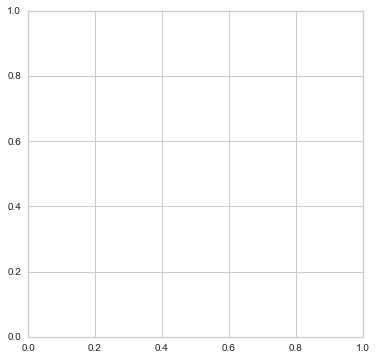

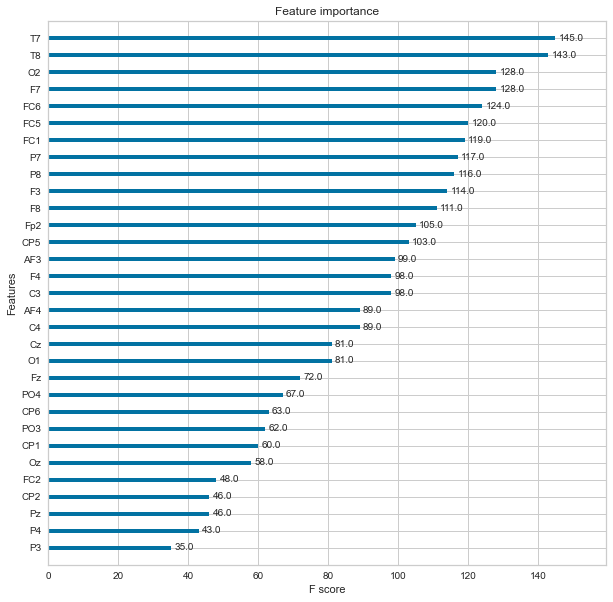

In [30]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

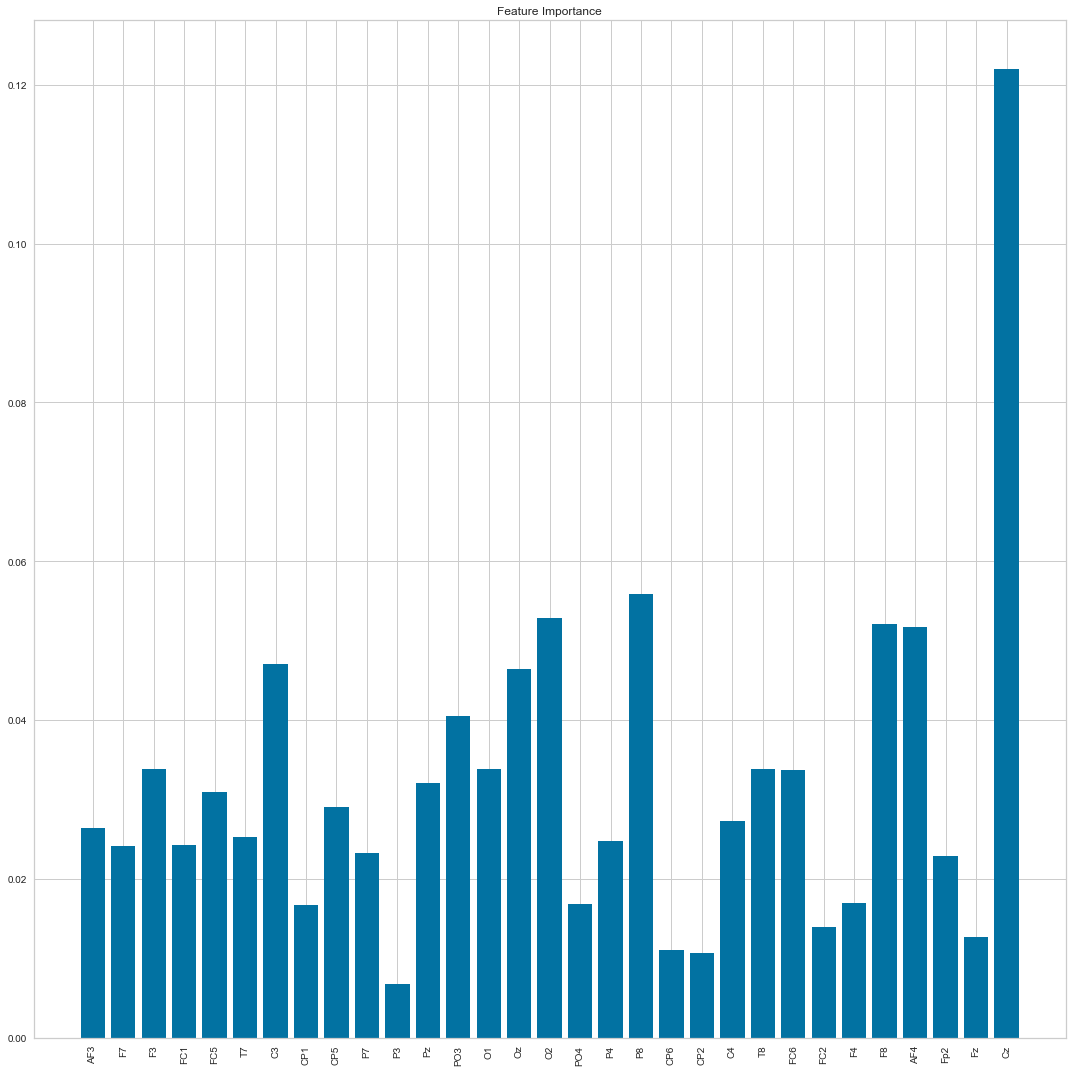

In [31]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

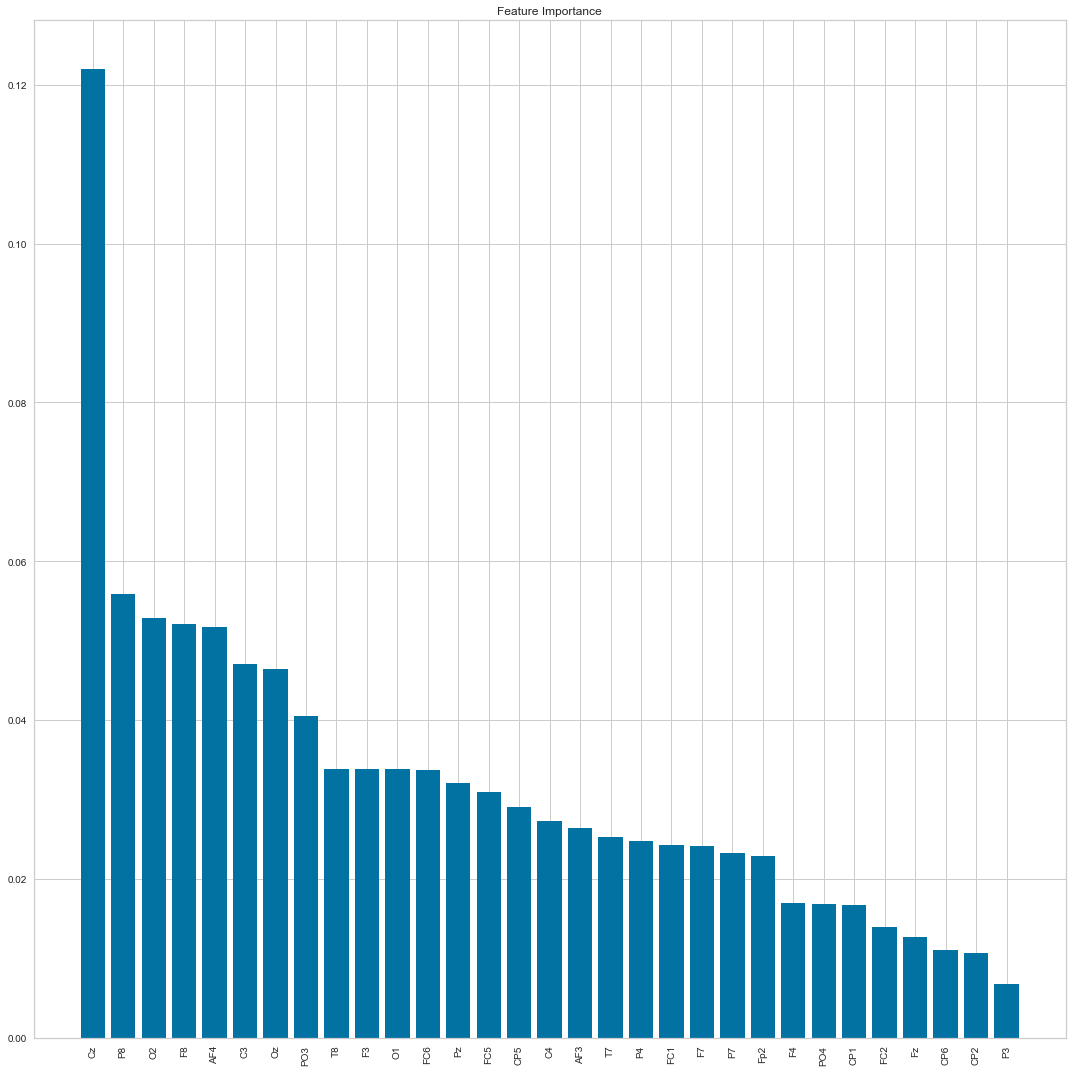

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9483839845634346


<h2>n=5 -> 94.80%</h2>

In [34]:
subject = "sub-hc33"
path = f"{os_path}/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

Extracting EDF parameters from C:\Users\utkar\Desktop\Research_Paper\EEG Analysis\Corollary\Parkinsons-EEG-DeepLearning\Parkinson's disease dataset\Healthy\sub-hc33\ses-hc\eeg\sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    1.9s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

In [35]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

In [36]:
importances

array([0.02643435, 0.02412498, 0.03384132, 0.02429176, 0.03088743,
       0.02522595, 0.0470855 , 0.01665866, 0.02906659, 0.02332462,
       0.00671853, 0.03204356, 0.04055709, 0.03382684, 0.04643559,
       0.05290545, 0.01685064, 0.02479662, 0.05593279, 0.01108452,
       0.01068968, 0.02732048, 0.03386554, 0.03375282, 0.01390909,
       0.01693134, 0.05206629, 0.05178136, 0.02285328, 0.01274415,
       0.12199323], dtype=float32)

In [37]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02643435, 0.02412498, 0.03384132, 0.02429176,
       0.03088743, 0.02522595, 0.0470855 , 0.01665866, 0.02906659,
       0.02332462, 0.00671853, 0.03204356, 0.04055709, 0.03382684,
       0.04643559, 0.05290545, 0.01685064, 0.02479662, 0.05593279,
       0.01108452, 0.01068968, 0.02732048, 0.03386554, 0.03375282,
       0.01390909, 0.01693134, 0.05206629, 0.05178136, 0.02285328,
       0.01274415, 0.12199323])

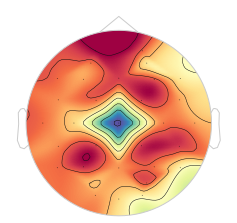

(<matplotlib.image.AxesImage at 0x21a38c01a90>,
 <matplotlib.contour.QuadContourSet at 0x21a38c01b20>)

In [38]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>2. Katz</h2>

In [39]:
katz_pd['Y'] = 1
katz['Y'] = 0

In [40]:
X1 = katz.append(katz_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2.288694,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,...,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711,0
1,1.856302,2.207272,1.813493,2.086551,2.150677,1.929220,1.795832,1.776402,1.745417,2.123935,...,2.106223,1.970152,1.745334,1.665783,2.020566,2.090153,2.012203,1.832529,1.670601,0
2,2.144170,1.975911,1.730994,2.190352,2.211066,2.002647,1.968288,1.722608,1.841809,2.297257,...,2.101464,2.109350,1.971473,1.895240,1.931973,1.898496,2.162263,1.974926,2.107759,0
3,2.240669,1.832651,1.457504,1.540809,1.968830,1.998767,1.823726,1.736550,1.903326,1.937638,...,2.100638,1.820048,1.958333,1.932143,2.064011,2.002063,2.386283,2.011129,2.035523,0
4,1.897278,2.186063,1.759125,1.622589,2.153089,1.764412,1.985599,1.712290,1.938490,2.182477,...,2.452825,1.697789,1.538891,1.848033,2.033234,1.999628,2.295351,1.864013,2.184189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2.041552,2.144090,1.890192,1.876422,1.954275,1.871034,2.010155,1.998323,1.877617,1.872551,...,1.803391,1.998558,1.963765,2.017887,1.832857,2.090989,1.869046,2.045576,1.798334,1
6275,1.821419,1.762593,1.705675,1.823579,1.813179,1.642534,1.718829,1.685374,1.763130,1.743715,...,2.085898,1.782110,1.739254,1.880596,1.690625,1.883152,1.684183,1.777959,1.618169,1
6276,2.200097,1.871101,1.798078,1.892412,1.865502,1.815694,1.917021,1.750883,1.778239,1.968039,...,2.268458,2.147468,1.749178,1.973604,1.863601,2.033707,1.821035,1.699085,1.653234,1
6277,2.011331,1.869370,1.839220,1.904751,1.906699,1.936482,2.068709,1.947420,1.790364,1.903824,...,2.197836,2.117768,2.075554,1.771493,1.887688,2.008092,1.726404,1.791014,1.725862,1


<h2>Pycaret</h2>

In [41]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,3122
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8025,0.8866,0.8462,0.7964,0.8202,0.6016,0.6035,0.0053
lightgbm,Light Gradient Boosting Machine,0.7909,0.8737,0.8312,0.7884,0.8088,0.5784,0.5801,0.0580
xgboost,Extreme Gradient Boosting,0.7891,0.8702,0.8325,0.7849,0.8077,0.5746,0.5764,0.3240
et,Extra Trees Classifier,0.7838,0.8633,0.8534,0.7674,0.8080,0.5624,0.5668,0.0947
rf,Random Forest Classifier,0.7697,0.8509,0.8167,0.7668,0.7906,0.5354,0.5374,0.1653
knn,K Neighbors Classifier,0.7602,0.8426,0.9120,0.7158,0.8020,0.5090,0.5337,0.1827
gbc,Gradient Boosting Classifier,0.7527,0.8349,0.8201,0.7431,0.7792,0.4996,0.5039,0.3040
ada,Ada Boost Classifier,0.6972,0.7649,0.7560,0.6999,0.7263,0.3883,0.3906,0.0733
lr,Logistic Regression,0.6858,0.7418,0.7517,0.6877,0.7179,0.3648,0.3673,0.4760
lda,Linear Discriminant Analysis,0.6824,0.7418,0.7513,0.6839,0.7156,0.3576,0.3603,0.0053


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

In [44]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [45]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,2.089633,...,2.265941,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711
1,2.207272,1.813493,2.086551,2.150677,1.929220,1.795832,1.776402,1.745417,2.123935,1.867432,...,1.950851,2.106223,1.970152,1.745334,1.665783,2.020566,2.090153,2.012203,1.832529,1.670601
2,1.975911,1.730994,2.190352,2.211066,2.002647,1.968288,1.722608,1.841809,2.297257,2.016450,...,2.057196,2.101464,2.109350,1.971473,1.895240,1.931973,1.898496,2.162263,1.974926,2.107759
3,1.832651,1.457504,1.540809,1.968830,1.998767,1.823726,1.736550,1.903326,1.937638,2.019698,...,2.228948,2.100638,1.820048,1.958333,1.932143,2.064011,2.002063,2.386283,2.011129,2.035523
4,2.186063,1.759125,1.622589,2.153089,1.764412,1.985599,1.712290,1.938490,2.182477,2.378334,...,2.280013,2.452825,1.697789,1.538891,1.848033,2.033234,1.999628,2.295351,1.864013,2.184189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2.144090,1.890192,1.876422,1.954275,1.871034,2.010155,1.998323,1.877617,1.872551,1.853785,...,1.914380,1.803391,1.998558,1.963765,2.017887,1.832857,2.090989,1.869046,2.045576,1.798334
6275,1.762593,1.705675,1.823579,1.813179,1.642534,1.718829,1.685374,1.763130,1.743715,1.765843,...,1.855814,2.085898,1.782110,1.739254,1.880596,1.690625,1.883152,1.684183,1.777959,1.618169
6276,1.871101,1.798078,1.892412,1.865502,1.815694,1.917021,1.750883,1.778239,1.968039,1.858619,...,1.999459,2.268458,2.147468,1.749178,1.973604,1.863601,2.033707,1.821035,1.699085,1.653234
6277,1.869370,1.839220,1.904751,1.906699,1.936482,2.068709,1.947420,1.790364,1.903824,1.951909,...,2.050329,2.197836,2.117768,2.075554,1.771493,1.887688,2.008092,1.726404,1.791014,1.725862


In [46]:
Y = X1['Y']
Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [47]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.11%


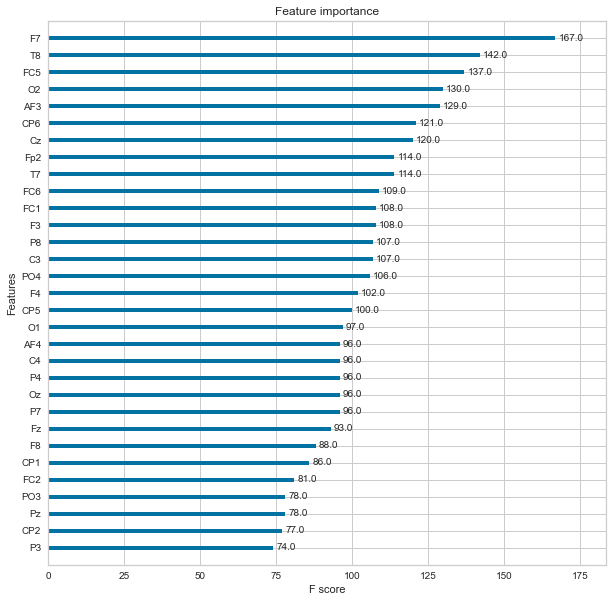

In [48]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

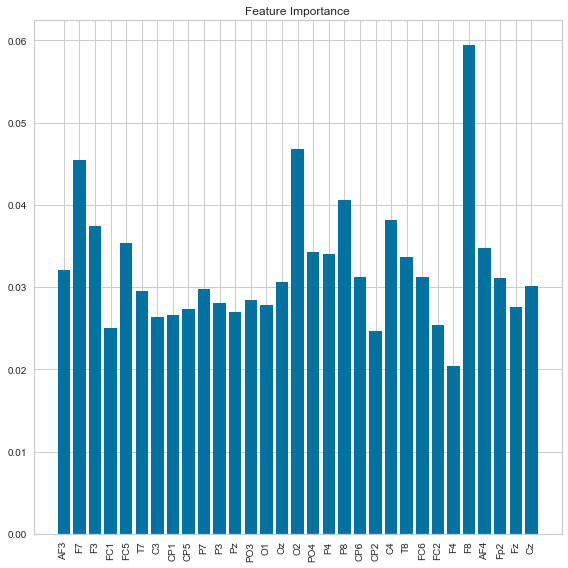

In [49]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

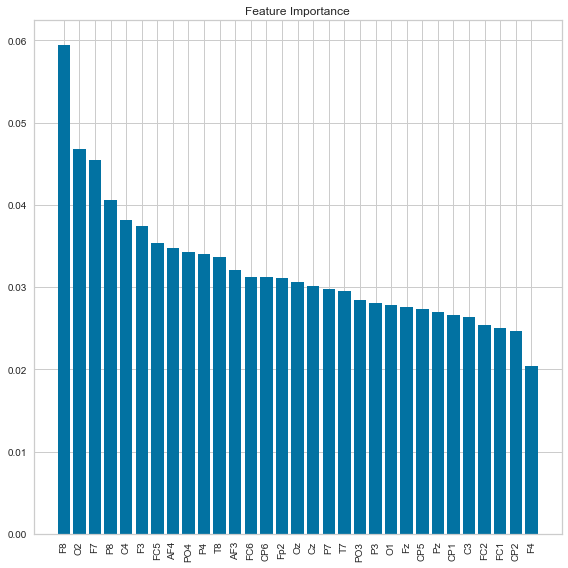

In [50]:
fig, ax = plt.subplots(figsize=(8,8))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [51]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03204674, 0.04545084, 0.03740539, 0.02506252,
       0.03530571, 0.02948959, 0.02639726, 0.02663421, 0.02736903,
       0.02970073, 0.02804515, 0.02698959, 0.02846465, 0.02779626,
       0.03056796, 0.04680005, 0.03423445, 0.03398704, 0.04053553,
       0.03115839, 0.0246602 , 0.03812255, 0.03367273, 0.03118403,
       0.02544245, 0.020415  , 0.05943488, 0.03476356, 0.03108912,
       0.02761032, 0.03016398])

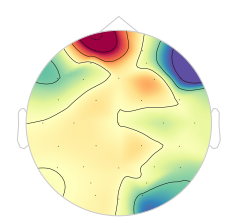

(<matplotlib.image.AxesImage at 0x21a38761dc0>,
 <matplotlib.contour.QuadContourSet at 0x21a38776280>)

In [52]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>3. Petrosian</h2>

In [53]:
petrosian_pd['Y'] = 1
petrosian['Y'] = 0

In [54]:
X1 = petrosian.append(petrosian_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.008246,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,...,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155,0
1,1.007519,1.007276,1.007640,1.007033,1.006911,1.006790,1.006668,1.007519,1.006790,1.007155,...,1.007033,1.007033,1.006546,1.006546,1.007519,1.007033,1.007033,1.006790,1.006668,0
2,1.008125,1.007398,1.006790,1.007033,1.007640,1.007155,1.005692,1.006546,1.006546,1.007398,...,1.007519,1.007640,1.006790,1.007033,1.007640,1.006424,1.006790,1.006546,1.006911,0
3,1.007883,1.007033,1.006424,1.007276,1.007276,1.006424,1.005936,1.006911,1.006424,1.006546,...,1.007761,1.007276,1.006790,1.007398,1.007883,1.006424,1.006790,1.006546,1.006790,0
4,1.007519,1.007155,1.007640,1.007033,1.006302,1.007155,1.007640,1.006668,1.005570,1.005325,...,1.008367,1.007398,1.006058,1.007640,1.007883,1.007155,1.007276,1.006546,1.006302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.006790,1.006790,1.006180,1.006302,1.006546,1.007155,1.006180,1.006424,1.005202,1.004957,...,1.007033,1.006911,1.005447,1.005447,1.005692,1.005814,1.005447,1.005570,1.005936,1
6275,1.006058,1.007398,1.005936,1.007155,1.006424,1.006668,1.006790,1.005814,1.005936,1.005202,...,1.008004,1.007155,1.005936,1.006180,1.005814,1.006180,1.005692,1.005447,1.007155,1
6276,1.007761,1.008246,1.006180,1.008246,1.006058,1.007398,1.007883,1.006424,1.006790,1.006180,...,1.008367,1.007883,1.005814,1.007155,1.007033,1.006790,1.005936,1.005814,1.006424,1
6277,1.007761,1.007640,1.005447,1.007640,1.006302,1.007640,1.007033,1.007033,1.005692,1.005936,...,1.008971,1.007033,1.005814,1.006790,1.006668,1.006668,1.006180,1.006302,1.005936,1


<h2>Pycaret</h2>

In [55]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,327
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [56]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9147,0.9656,0.9037,0.9291,0.9160,0.8293,0.8301,0.0253
xgboost,Extreme Gradient Boosting,0.8997,0.9610,0.8895,0.9144,0.9013,0.7993,0.8004,0.0893
lightgbm,Light Gradient Boosting Machine,0.8910,0.9586,0.8754,0.9103,0.8921,0.7821,0.7834,0.0200
et,Extra Trees Classifier,0.8901,0.9505,0.8608,0.9214,0.8897,0.7804,0.7827,0.0800
rf,Random Forest Classifier,0.8780,0.9438,0.8537,0.9043,0.8781,0.7563,0.7579,0.1073
qda,Quadratic Discriminant Analysis,0.8774,0.9499,0.8603,0.8983,0.8783,0.7548,0.7565,0.0040
gbc,Gradient Boosting Classifier,0.8510,0.9282,0.8316,0.8735,0.8516,0.7021,0.7036,0.1240
ada,Ada Boost Classifier,0.7929,0.8759,0.7830,0.8095,0.7956,0.5859,0.5869,0.0360
dt,Decision Tree Classifier,0.7679,0.7677,0.7751,0.7746,0.7746,0.5354,0.5358,0.0087
lda,Linear Discriminant Analysis,0.7600,0.8347,0.7503,0.7771,0.7629,0.5199,0.5209,0.0053


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
knn = create_model('knn', n_neighbors=5, leaf_size=30, p=2, weights='uniform', metric='minkowski', algorithm='auto', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9044,0.9665,0.8808,0.9301,0.9048,0.8090,0.8102
1,0.9215,0.9726,0.9073,0.9384,0.9226,0.8430,0.8435
2,0.9181,0.9633,0.9205,0.9205,0.9205,0.8360,0.8360
3,0.9113,0.9725,0.9272,0.9032,0.9150,0.8222,0.8225
4,0.9249,0.9781,0.9205,0.9329,0.9267,0.8498,0.8498
5,0.9249,0.9688,0.8940,0.9574,0.9247,0.8500,0.8520
6,0.9249,0.9705,0.9272,0.9272,0.9272,0.8497,0.8497
7,0.9078,0.9575,0.9205,0.9026,0.9115,0.8154,0.8156
8,0.9181,0.9520,0.8874,0.9504,0.9178,0.8364,0.8383


<h3>KNN gives highest - 91.17% for k=5</h3>

In [58]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [59]:
#X = X1.iloc[:, :-1]
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,1.007155,...,1.006058,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155
1,1.007276,1.007640,1.007033,1.006911,1.006790,1.006668,1.007519,1.006790,1.007155,1.007640,...,1.006546,1.007033,1.007033,1.006546,1.006546,1.007519,1.007033,1.007033,1.006790,1.006668
2,1.007398,1.006790,1.007033,1.007640,1.007155,1.005692,1.006546,1.006546,1.007398,1.007155,...,1.007033,1.007519,1.007640,1.006790,1.007033,1.007640,1.006424,1.006790,1.006546,1.006911
3,1.007033,1.006424,1.007276,1.007276,1.006424,1.005936,1.006911,1.006424,1.006546,1.006058,...,1.006546,1.007761,1.007276,1.006790,1.007398,1.007883,1.006424,1.006790,1.006546,1.006790
4,1.007155,1.007640,1.007033,1.006302,1.007155,1.007640,1.006668,1.005570,1.005325,1.006302,...,1.007155,1.008367,1.007398,1.006058,1.007640,1.007883,1.007155,1.007276,1.006546,1.006302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.006790,1.006180,1.006302,1.006546,1.007155,1.006180,1.006424,1.005202,1.004957,1.004712,...,1.005447,1.007033,1.006911,1.005447,1.005447,1.005692,1.005814,1.005447,1.005570,1.005936
6275,1.007398,1.005936,1.007155,1.006424,1.006668,1.006790,1.005814,1.005936,1.005202,1.005080,...,1.006058,1.008004,1.007155,1.005936,1.006180,1.005814,1.006180,1.005692,1.005447,1.007155
6276,1.008246,1.006180,1.008246,1.006058,1.007398,1.007883,1.006424,1.006790,1.006180,1.005936,...,1.006911,1.008367,1.007883,1.005814,1.007155,1.007033,1.006790,1.005936,1.005814,1.006424
6277,1.007640,1.005447,1.007640,1.006302,1.007640,1.007033,1.007033,1.005692,1.005936,1.005325,...,1.006911,1.008971,1.007033,1.005814,1.006790,1.006668,1.006668,1.006180,1.006302,1.005936


In [60]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [62]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [63]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,1.008971,1.008609,1.007398,1.007640,1.009332,1.008488,1.008729,1.008609,1.008488,1.008609,...,1.008850,1.008004,1.008971,1.008609,1.008729,1.008246,1.008729,1.008004,1.008488,1.008367
1796,1.008971,1.009693,1.008729,1.007761,1.008367,1.008971,1.008004,1.007155,1.008729,1.008246,...,1.007761,1.009091,1.008729,1.008246,1.009453,1.008609,1.009453,1.009212,1.008004,1.008246
6232,1.007033,1.008850,1.007398,1.005692,1.006911,1.007276,1.006424,1.006424,1.006546,1.005814,...,1.008246,1.008850,1.008729,1.006058,1.007276,1.007155,1.006790,1.006302,1.006058,1.005814
4868,1.006911,1.006546,1.007033,1.006058,1.006546,1.007155,1.006302,1.007155,1.006546,1.007761,...,1.006302,1.007155,1.006424,1.005814,1.006546,1.007883,1.006911,1.007398,1.006058,1.006058
2715,1.009693,1.008850,1.008609,1.007519,1.008850,1.008488,1.008609,1.008004,1.007640,1.007640,...,1.008367,1.008367,1.007883,1.008125,1.008125,1.008246,1.008004,1.008729,1.006424,1.007640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.007155,1.007640,1.007761,1.006302,1.008004,1.007519,1.007033,1.007519,1.007398,1.008246,...,1.006546,1.007761,1.007276,1.007155,1.007155,1.006546,1.007155,1.007276,1.006424,1.006546
4060,1.008367,1.007276,1.007276,1.005570,1.008004,1.006180,1.005936,1.004957,1.006180,1.006911,...,1.006668,1.008850,1.007033,1.006302,1.008004,1.006180,1.008367,1.007640,1.006058,1.006790
1346,1.008850,1.008004,1.007519,1.006668,1.007398,1.007398,1.007155,1.005325,1.005814,1.006058,...,1.005936,1.008125,1.006424,1.006180,1.006911,1.007640,1.007033,1.007398,1.005814,1.006424
3454,1.008367,1.008367,1.006546,1.005936,1.007761,1.006911,1.006058,1.006180,1.005080,1.006790,...,1.005570,1.008125,1.006302,1.006058,1.007519,1.008609,1.008609,1.007883,1.006668,1.005814


In [64]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9088277858176556


<h2>XGBoost</h2>

In [65]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.28%


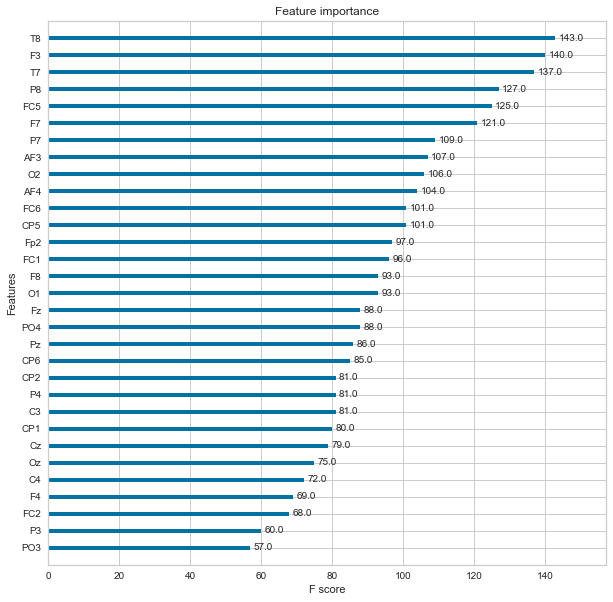

In [66]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

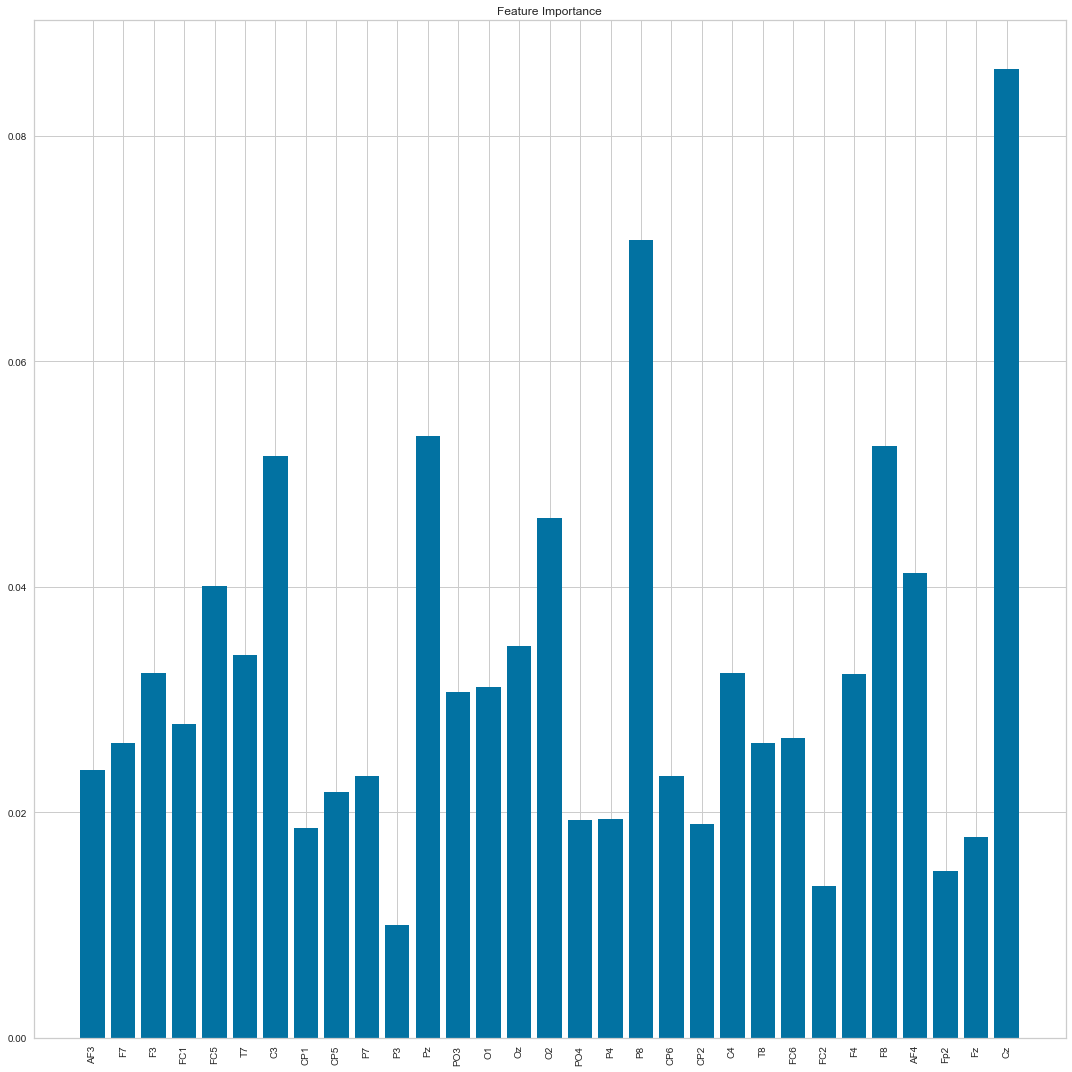

In [67]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

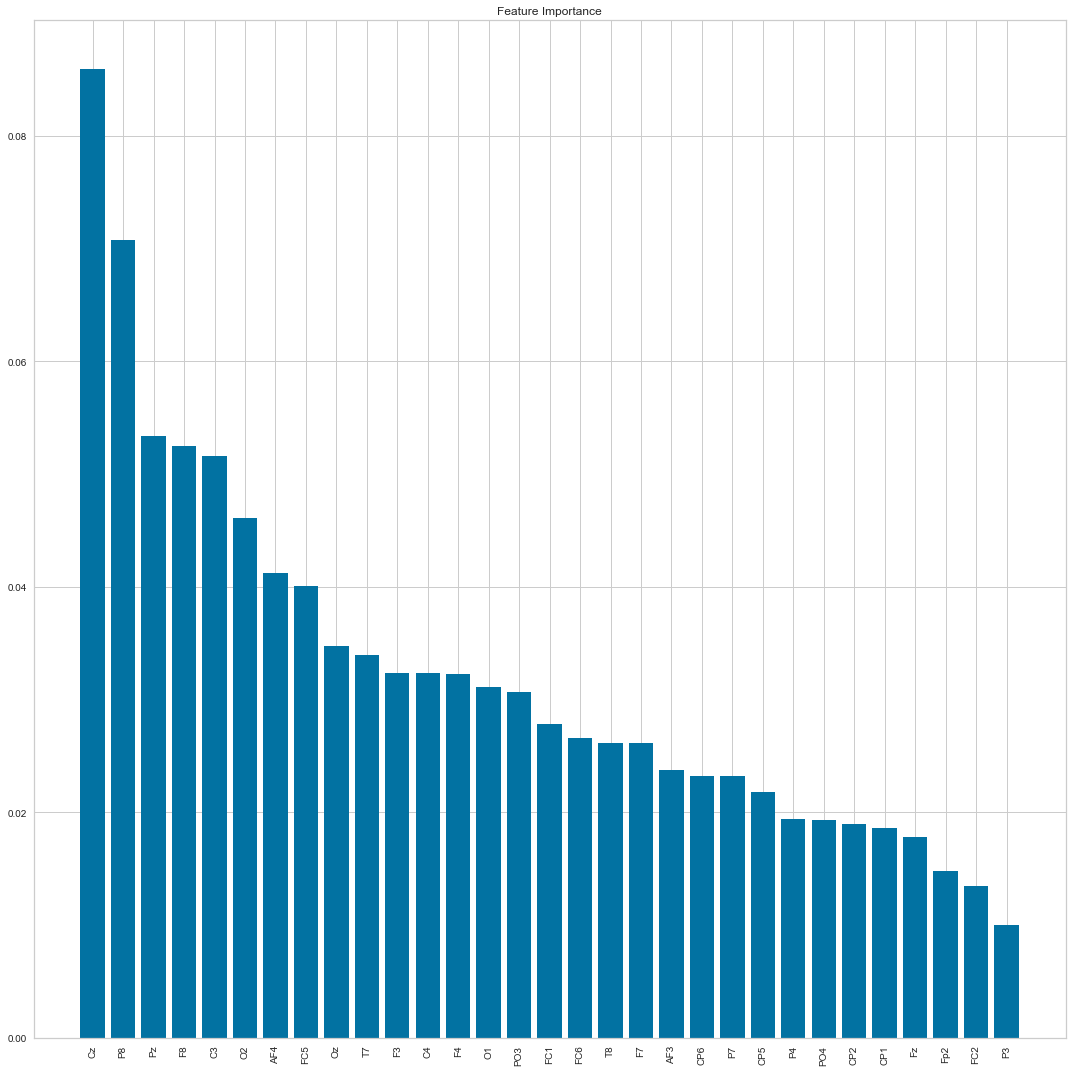

In [68]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [69]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02372599, 0.02611527, 0.03239319, 0.02781885,
       0.04008101, 0.03391246, 0.05159805, 0.01861713, 0.02178752,
       0.02325227, 0.0100037 , 0.05334984, 0.03065633, 0.03108823,
       0.03472885, 0.04611157, 0.0193308 , 0.01937631, 0.07074291,
       0.02325482, 0.01897193, 0.0323348 , 0.02613448, 0.02663655,
       0.01346793, 0.03228467, 0.05247073, 0.04120579, 0.0147767 ,
       0.01782686, 0.08594453])

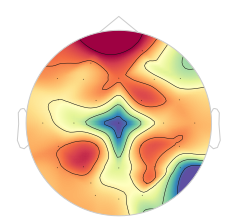

(<matplotlib.image.AxesImage at 0x21a38974610>,
 <matplotlib.contour.QuadContourSet at 0x21a389748b0>)

In [70]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>4. Spectral Entropy</h2>

In [71]:
spec_ent_pd['Y'] = 1
spec_ent['Y'] = 0

In [72]:
X1 = spec_ent.append(spec_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.593967,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,...,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731,0
1,0.585720,0.576237,0.524875,0.574399,0.546275,0.558093,0.517189,0.554932,0.556446,0.602096,...,0.583725,0.546290,0.556225,0.456143,0.511603,0.520877,0.540161,0.575035,0.575193,0
2,0.565498,0.590731,0.499751,0.576042,0.554548,0.521498,0.536025,0.548781,0.526389,0.567170,...,0.579970,0.595283,0.552707,0.486873,0.578784,0.490966,0.544766,0.467088,0.481327,0
3,0.576343,0.553508,0.317454,0.443256,0.549690,0.534552,0.551327,0.367509,0.518702,0.517488,...,0.595044,0.565175,0.475630,0.543204,0.565701,0.582231,0.598716,0.517816,0.487931,0
4,0.564918,0.590362,0.286799,0.356163,0.574863,0.449226,0.526011,0.355215,0.416370,0.547122,...,0.598434,0.489233,0.326823,0.545404,0.595191,0.590936,0.538593,0.540984,0.582147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.528360,0.534449,0.512246,0.488603,0.503602,0.506542,0.534379,0.528971,0.466418,0.481732,...,0.568552,0.560350,0.444908,0.509261,0.511133,0.468276,0.484738,0.436072,0.475440,1
6275,0.499524,0.506832,0.461508,0.534796,0.490991,0.474424,0.546550,0.497546,0.439697,0.501631,...,0.592186,0.542775,0.476146,0.518637,0.476226,0.520475,0.472051,0.447344,0.506192,1
6276,0.525442,0.521815,0.467658,0.545974,0.502535,0.439392,0.523816,0.428575,0.486957,0.488384,...,0.632685,0.577777,0.486370,0.496376,0.486113,0.555218,0.478121,0.465290,0.513768,1
6277,0.540420,0.546328,0.502187,0.525852,0.510016,0.493849,0.532616,0.483729,0.486084,0.451629,...,0.616307,0.556857,0.523069,0.476310,0.513548,0.525025,0.509304,0.521811,0.528828,1


In [73]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,6153
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8767,0.9507,0.8858,0.8793,0.8822,0.7528,0.7536,0.2967
lightgbm,Light Gradient Boosting Machine,0.8694,0.9465,0.8762,0.8745,0.8750,0.7383,0.7389,0.0593
et,Extra Trees Classifier,0.8603,0.9372,0.8688,0.8652,0.8666,0.7199,0.7207,0.0853
knn,K Neighbors Classifier,0.8601,0.9285,0.9198,0.8305,0.8727,0.7182,0.7233,0.0313
rf,Random Forest Classifier,0.8464,0.9278,0.8418,0.8618,0.8511,0.6925,0.6936,0.1540
qda,Quadratic Discriminant Analysis,0.8416,0.9265,0.8884,0.8230,0.8542,0.6815,0.6843,0.0040
gbc,Gradient Boosting Classifier,0.8191,0.9032,0.8300,0.8255,0.8270,0.6374,0.6387,0.2920
ada,Ada Boost Classifier,0.7447,0.8247,0.7773,0.7458,0.7605,0.4874,0.4890,0.0727
dt,Decision Tree Classifier,0.7279,0.7274,0.7371,0.7411,0.7386,0.4548,0.4555,0.0140
lda,Linear Discriminant Analysis,0.7233,0.7909,0.7515,0.7278,0.7391,0.4447,0.4455,0.0053


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6153, reg_alpha=0, ...)

In [75]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [76]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,0.571492,...,0.577837,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731
1,0.576237,0.524875,0.574399,0.546275,0.558093,0.517189,0.554932,0.556446,0.602096,0.570408,...,0.567459,0.583725,0.546290,0.556225,0.456143,0.511603,0.520877,0.540161,0.575035,0.575193
2,0.590731,0.499751,0.576042,0.554548,0.521498,0.536025,0.548781,0.526389,0.567170,0.518985,...,0.596694,0.579970,0.595283,0.552707,0.486873,0.578784,0.490966,0.544766,0.467088,0.481327
3,0.553508,0.317454,0.443256,0.549690,0.534552,0.551327,0.367509,0.518702,0.517488,0.506391,...,0.587771,0.595044,0.565175,0.475630,0.543204,0.565701,0.582231,0.598716,0.517816,0.487931
4,0.590362,0.286799,0.356163,0.574863,0.449226,0.526011,0.355215,0.416370,0.547122,0.571079,...,0.568154,0.598434,0.489233,0.326823,0.545404,0.595191,0.590936,0.538593,0.540984,0.582147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.534449,0.512246,0.488603,0.503602,0.506542,0.534379,0.528971,0.466418,0.481732,0.494260,...,0.490162,0.568552,0.560350,0.444908,0.509261,0.511133,0.468276,0.484738,0.436072,0.475440
6275,0.506832,0.461508,0.534796,0.490991,0.474424,0.546550,0.497546,0.439697,0.501631,0.519043,...,0.468076,0.592186,0.542775,0.476146,0.518637,0.476226,0.520475,0.472051,0.447344,0.506192
6276,0.521815,0.467658,0.545974,0.502535,0.439392,0.523816,0.428575,0.486957,0.488384,0.497529,...,0.557701,0.632685,0.577777,0.486370,0.496376,0.486113,0.555218,0.478121,0.465290,0.513768
6277,0.546328,0.502187,0.525852,0.510016,0.493849,0.532616,0.483729,0.486084,0.451629,0.440328,...,0.569128,0.616307,0.556857,0.523069,0.476310,0.513548,0.525025,0.509304,0.521811,0.528828


In [77]:
Y = X3['Y']
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [79]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.571247,0.592864,0.594819,0.562607,0.599839,0.564262,0.610708,0.585688,0.607363,0.607618,...,0.588167,0.587463,0.599500,0.625668,0.603608,0.592789,0.622366,0.577848,0.600889,0.599260
1796,0.581965,0.553040,0.535235,0.451964,0.478145,0.576106,0.609826,0.380559,0.601466,0.614379,...,0.520694,0.577668,0.422848,0.614882,0.565230,0.480799,0.545816,0.538219,0.550897,0.625454
6232,0.549286,0.620169,0.561768,0.460973,0.477933,0.550427,0.427441,0.498937,0.504089,0.464631,...,0.579667,0.611602,0.605274,0.504380,0.589288,0.561895,0.510692,0.529274,0.498567,0.500288
4868,0.566171,0.568851,0.566065,0.564359,0.560286,0.579015,0.551645,0.557355,0.563467,0.585304,...,0.541578,0.594894,0.595784,0.558008,0.581672,0.611246,0.578836,0.621256,0.550987,0.551113
2715,0.544693,0.572602,0.589021,0.550944,0.585572,0.606359,0.502760,0.564815,0.600056,0.591080,...,0.601333,0.608281,0.614705,0.600889,0.605125,0.617643,0.591266,0.582746,0.480121,0.534792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.467837,0.454166,0.469997,0.468555,0.410142,0.508246,0.554400,0.529401,0.500953,0.497376,...,0.579535,0.576120,0.534431,0.526539,0.523437,0.527691,0.476431,0.555360,0.437821,0.529664
4060,0.492093,0.533270,0.508201,0.422431,0.595515,0.573030,0.562755,0.378729,0.507509,0.480838,...,0.531835,0.578261,0.540624,0.538320,0.594793,0.528002,0.593025,0.588270,0.467981,0.518640
1346,0.616818,0.611292,0.582492,0.507724,0.478533,0.564068,0.539531,0.452845,0.495336,0.499152,...,0.463312,0.586559,0.496744,0.432513,0.492002,0.556707,0.536030,0.543073,0.475427,0.532143
3454,0.607022,0.610198,0.581261,0.520993,0.522579,0.479945,0.450296,0.477328,0.359998,0.428774,...,0.305225,0.518384,0.362631,0.421511,0.467285,0.483076,0.558912,0.516595,0.471852,0.489275


In [80]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.44%


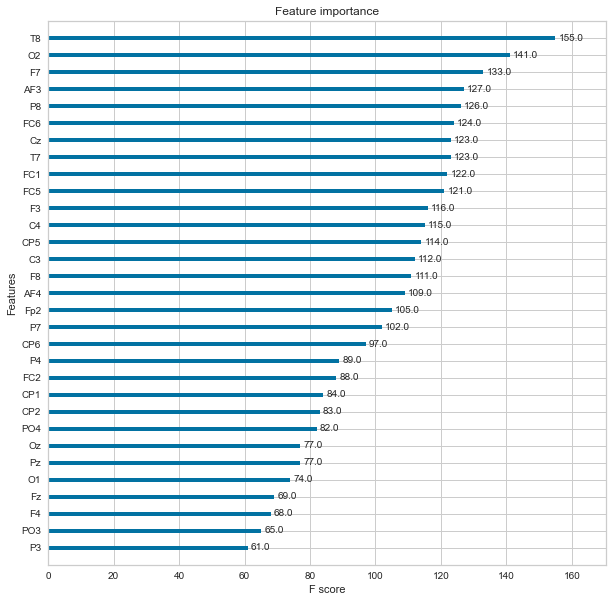

In [81]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

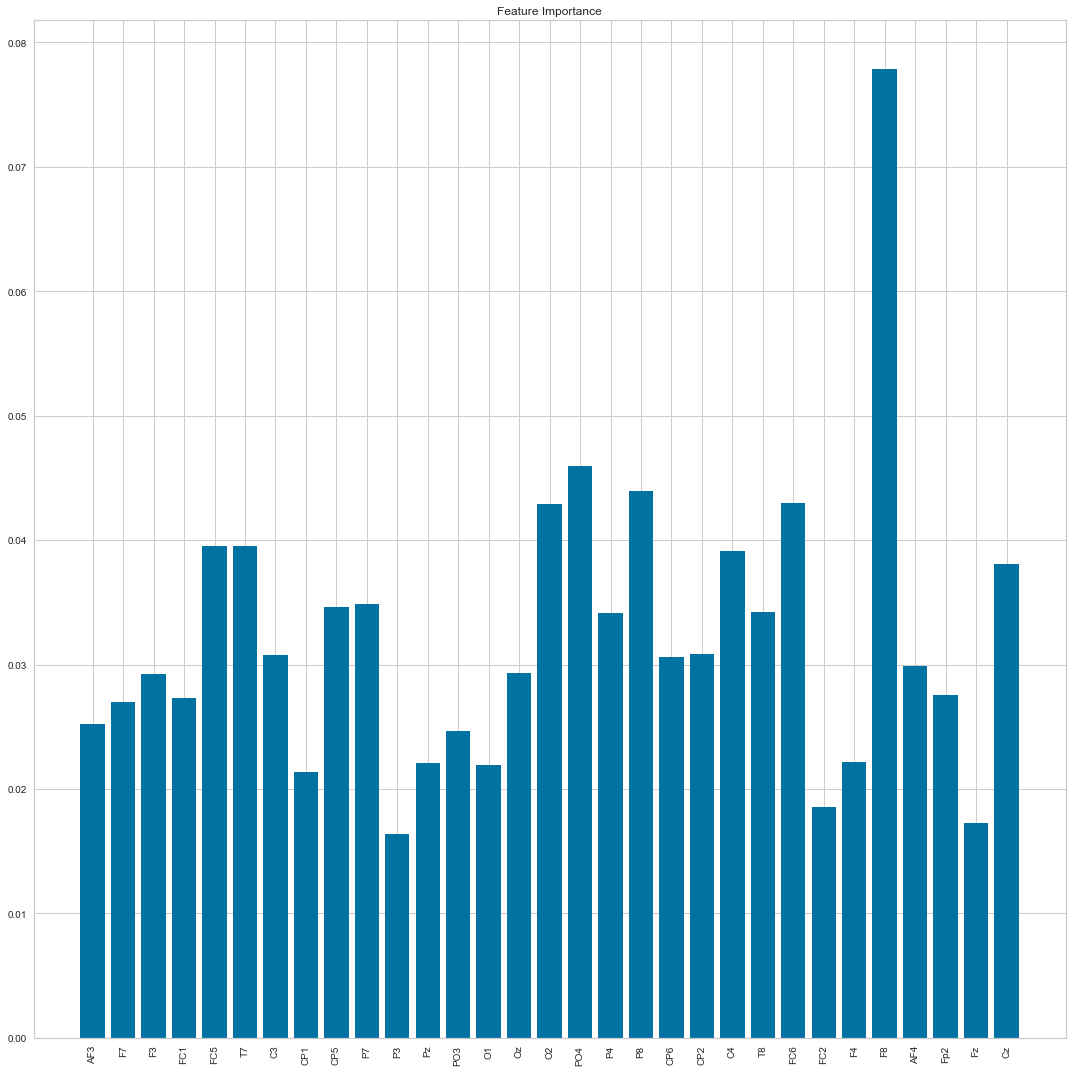

In [82]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

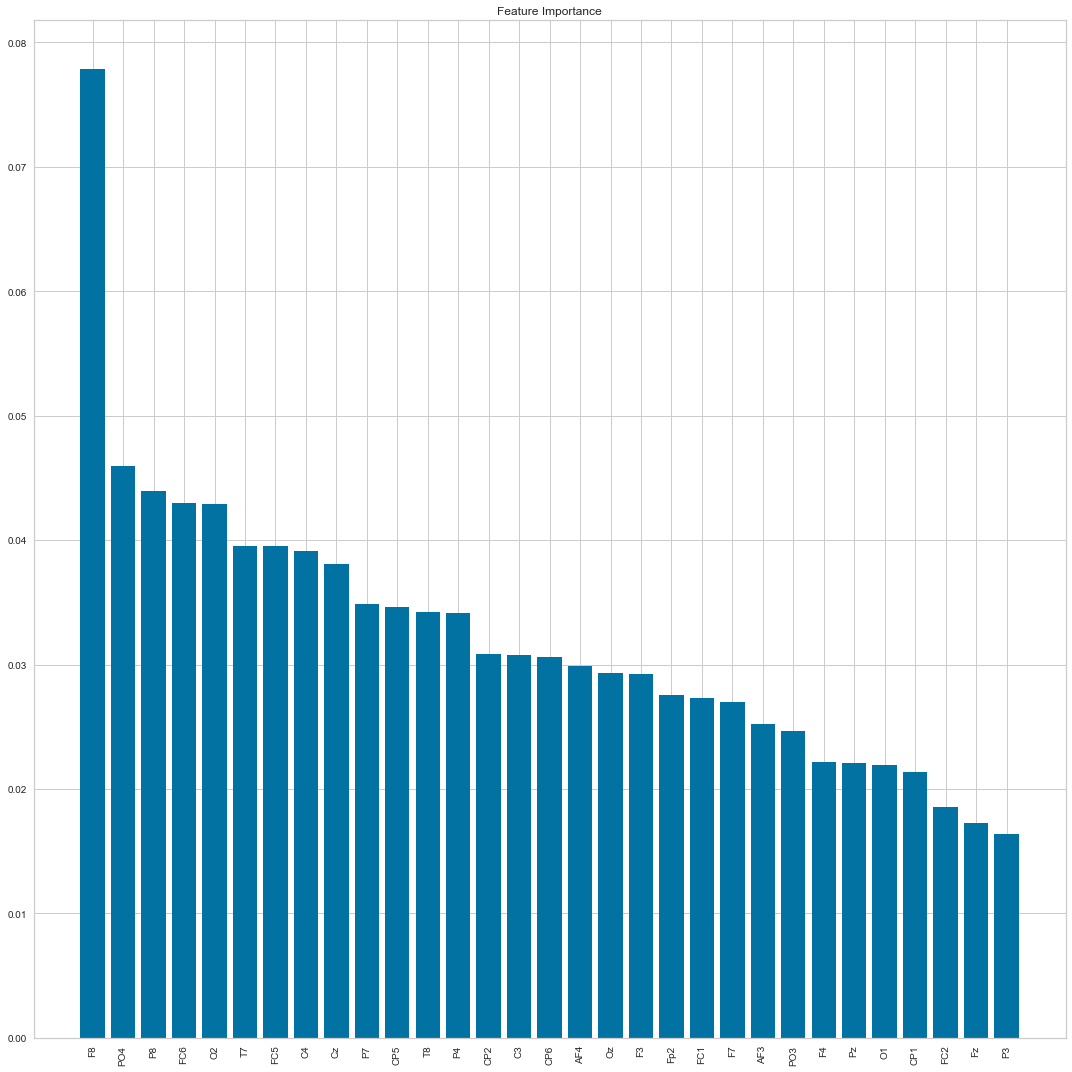

In [83]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [84]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02518873, 0.02696372, 0.02922176, 0.0273237 ,
       0.03949326, 0.03954833, 0.03079979, 0.0213675 , 0.03461932,
       0.03488076, 0.01640222, 0.02209443, 0.02465345, 0.02195703,
       0.02933227, 0.04293092, 0.04599255, 0.03415558, 0.04394717,
       0.03058457, 0.03083733, 0.03915801, 0.03424935, 0.04295845,
       0.01852636, 0.02213851, 0.07787237, 0.02988927, 0.02755193,
       0.01728211, 0.03807912])

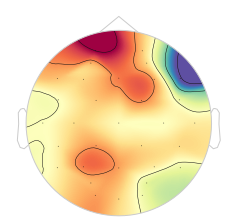

(<matplotlib.image.AxesImage at 0x21a3fd26a90>,
 <matplotlib.contour.QuadContourSet at 0x21a3fd26d30>)

In [85]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>5. Permutation Entropy</h2>

In [86]:
perm_ent_pd['Y'] = 1
perm_ent['Y'] = 0

In [87]:
X1 = perm_ent.append(perm_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.653851,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,...,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119,0
1,0.636773,0.630397,0.640150,0.620432,0.620282,0.618821,0.612595,0.635482,0.619260,0.627979,...,0.624725,0.624226,0.611212,0.612870,0.632692,0.623220,0.623103,0.618255,0.616132,0
2,0.650269,0.634148,0.619182,0.623764,0.639240,0.627596,0.587797,0.611964,0.611437,0.634109,...,0.636615,0.639352,0.618837,0.624552,0.638702,0.610018,0.614066,0.612132,0.618793,0
3,0.643998,0.624737,0.604815,0.630758,0.629598,0.609694,0.593551,0.622099,0.606516,0.612005,...,0.643080,0.630638,0.619062,0.633707,0.645297,0.607154,0.618832,0.612099,0.615013,0
4,0.634471,0.628013,0.632262,0.622604,0.605145,0.627391,0.637187,0.614432,0.587053,0.580424,...,0.656687,0.633841,0.600291,0.637264,0.645916,0.625321,0.631233,0.612444,0.604510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.616513,0.616141,0.602515,0.599123,0.611914,0.626900,0.602211,0.607723,0.575745,0.569410,...,0.622349,0.621849,0.581855,0.582908,0.590591,0.591358,0.582925,0.586919,0.593272,1
6275,0.598864,0.631286,0.596407,0.624277,0.609019,0.615508,0.614996,0.592442,0.594482,0.574320,...,0.647842,0.627817,0.592960,0.601882,0.593475,0.603176,0.589210,0.582361,0.626639,1
6276,0.641231,0.654002,0.602533,0.653447,0.598052,0.633987,0.645312,0.608733,0.618107,0.603733,...,0.656432,0.646098,0.593037,0.628341,0.624701,0.618726,0.597205,0.593115,0.609699,1
6277,0.641611,0.639680,0.583951,0.639691,0.605333,0.639045,0.624464,0.623655,0.587665,0.595286,...,0.670793,0.624894,0.591866,0.618896,0.616078,0.616132,0.602382,0.604182,0.596707,1


In [88]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,4647
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [89]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9053,0.9637,0.8980,0.9206,0.9089,0.8104,0.8111,0.0273
xgboost,Extreme Gradient Boosting,0.8906,0.9571,0.8803,0.9094,0.8942,0.7809,0.7819,0.2733
lightgbm,Light Gradient Boosting Machine,0.8892,0.9552,0.8755,0.9111,0.8926,0.7782,0.7794,0.0607
et,Extra Trees Classifier,0.8860,0.9496,0.8643,0.9150,0.8886,0.7721,0.7739,0.0853
rf,Random Forest Classifier,0.8685,0.9406,0.8517,0.8937,0.8720,0.7369,0.7382,0.1493
qda,Quadratic Discriminant Analysis,0.8644,0.9437,0.8448,0.8924,0.8677,0.7288,0.7305,0.0040
gbc,Gradient Boosting Classifier,0.8521,0.9226,0.8345,0.8787,0.8557,0.7042,0.7056,0.2913
ada,Ada Boost Classifier,0.7866,0.8622,0.7825,0.8069,0.7940,0.5727,0.5737,0.0700
lda,Linear Discriminant Analysis,0.7575,0.8322,0.7536,0.7794,0.7659,0.5144,0.5152,0.0053
dt,Decision Tree Classifier,0.7545,0.7534,0.7744,0.7635,0.7683,0.5073,0.5082,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [91]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,0.626956,...,0.599637,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119
1,0.630397,0.640150,0.620432,0.620282,0.618821,0.612595,0.635482,0.619260,0.627979,0.639665,...,0.612615,0.624725,0.624226,0.611212,0.612870,0.632692,0.623220,0.623103,0.618255,0.616132
2,0.634148,0.619182,0.623764,0.639240,0.627596,0.587797,0.611964,0.611437,0.634109,0.628088,...,0.625029,0.636615,0.639352,0.618837,0.624552,0.638702,0.610018,0.614066,0.612132,0.618793
3,0.624737,0.604815,0.630758,0.629598,0.609694,0.593551,0.622099,0.606516,0.612005,0.599959,...,0.613104,0.643080,0.630638,0.619062,0.633707,0.645297,0.607154,0.618832,0.612099,0.615013
4,0.628013,0.632262,0.622604,0.605145,0.627391,0.637187,0.614432,0.587053,0.580424,0.605392,...,0.626856,0.656687,0.633841,0.600291,0.637264,0.645916,0.625321,0.631233,0.612444,0.604510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.616141,0.602515,0.599123,0.611914,0.626900,0.602211,0.607723,0.575745,0.569410,0.562788,...,0.583195,0.622349,0.621849,0.581855,0.582908,0.590591,0.591358,0.582925,0.586919,0.593272
6275,0.631286,0.596407,0.624277,0.609019,0.615508,0.614996,0.592442,0.594482,0.574320,0.571048,...,0.597990,0.647842,0.627817,0.592960,0.601882,0.593475,0.603176,0.589210,0.582361,0.626639
6276,0.654002,0.602533,0.653447,0.598052,0.633987,0.645312,0.608733,0.618107,0.603733,0.594580,...,0.622340,0.656432,0.646098,0.593037,0.628341,0.624701,0.618726,0.597205,0.593115,0.609699
6277,0.639680,0.583951,0.639691,0.605333,0.639045,0.624464,0.623655,0.587665,0.595286,0.580387,...,0.620263,0.670793,0.624894,0.591866,0.618896,0.616078,0.616132,0.602382,0.604182,0.596707


In [92]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [94]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [95]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.670344,0.662440,0.632245,0.640208,0.679391,0.659964,0.663784,0.662481,0.660073,0.661691,...,0.666842,0.647051,0.665414,0.662990,0.665167,0.650855,0.664437,0.645228,0.658901,0.653157
1796,0.670272,0.687214,0.664567,0.635600,0.656168,0.671129,0.648162,0.626821,0.664538,0.653113,...,0.642110,0.673876,0.665252,0.652121,0.680356,0.659575,0.681778,0.676221,0.648236,0.653309
6232,0.625029,0.667609,0.633707,0.587729,0.621058,0.629322,0.607869,0.609465,0.610914,0.592945,...,0.651527,0.668544,0.665047,0.598009,0.631345,0.628120,0.616609,0.605128,0.597653,0.592570
4868,0.621946,0.611638,0.621478,0.597527,0.612443,0.628123,0.606328,0.626205,0.612621,0.642337,...,0.606366,0.628493,0.610037,0.590600,0.612573,0.643221,0.622139,0.630202,0.598651,0.600186
2715,0.685872,0.668321,0.662965,0.637132,0.666059,0.660172,0.662930,0.648783,0.637357,0.638751,...,0.655771,0.656307,0.644968,0.650269,0.649593,0.652601,0.646644,0.664527,0.607969,0.639045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.627876,0.637750,0.640773,0.604317,0.648576,0.633105,0.624788,0.637171,0.634402,0.653456,...,0.611581,0.642519,0.628717,0.627421,0.626821,0.611657,0.625961,0.631384,0.609205,0.611581
4060,0.657262,0.630650,0.628610,0.585614,0.648649,0.603276,0.593096,0.569892,0.603204,0.622099,...,0.615662,0.663178,0.621031,0.606295,0.648685,0.602138,0.656667,0.639832,0.597360,0.616804
1346,0.666119,0.646315,0.635902,0.611886,0.633695,0.632869,0.626284,0.576637,0.592681,0.599473,...,0.597110,0.650671,0.609918,0.603276,0.621227,0.633517,0.624026,0.634148,0.593709,0.608475
3454,0.655430,0.657381,0.611217,0.596521,0.640321,0.619297,0.597382,0.602151,0.573793,0.619269,...,0.586912,0.650541,0.602156,0.598669,0.635755,0.657603,0.661400,0.645901,0.614353,0.593631


<h2>KNN</h2>

In [96]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9040038591413411


<h2>XGBoost</h2>

In [97]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.71%


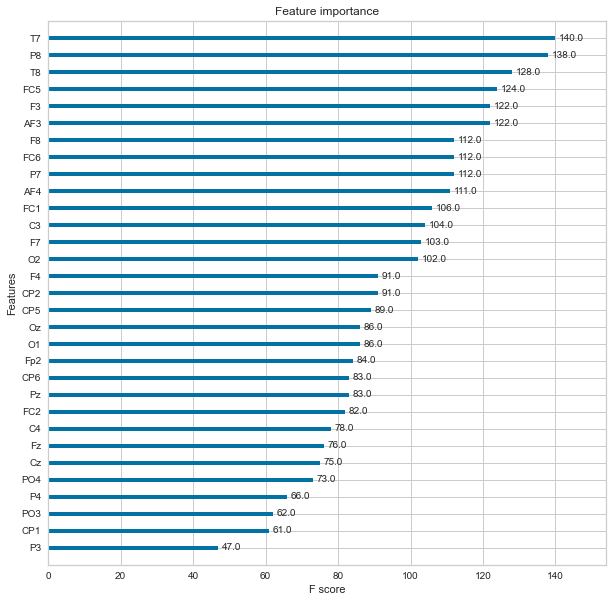

In [98]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

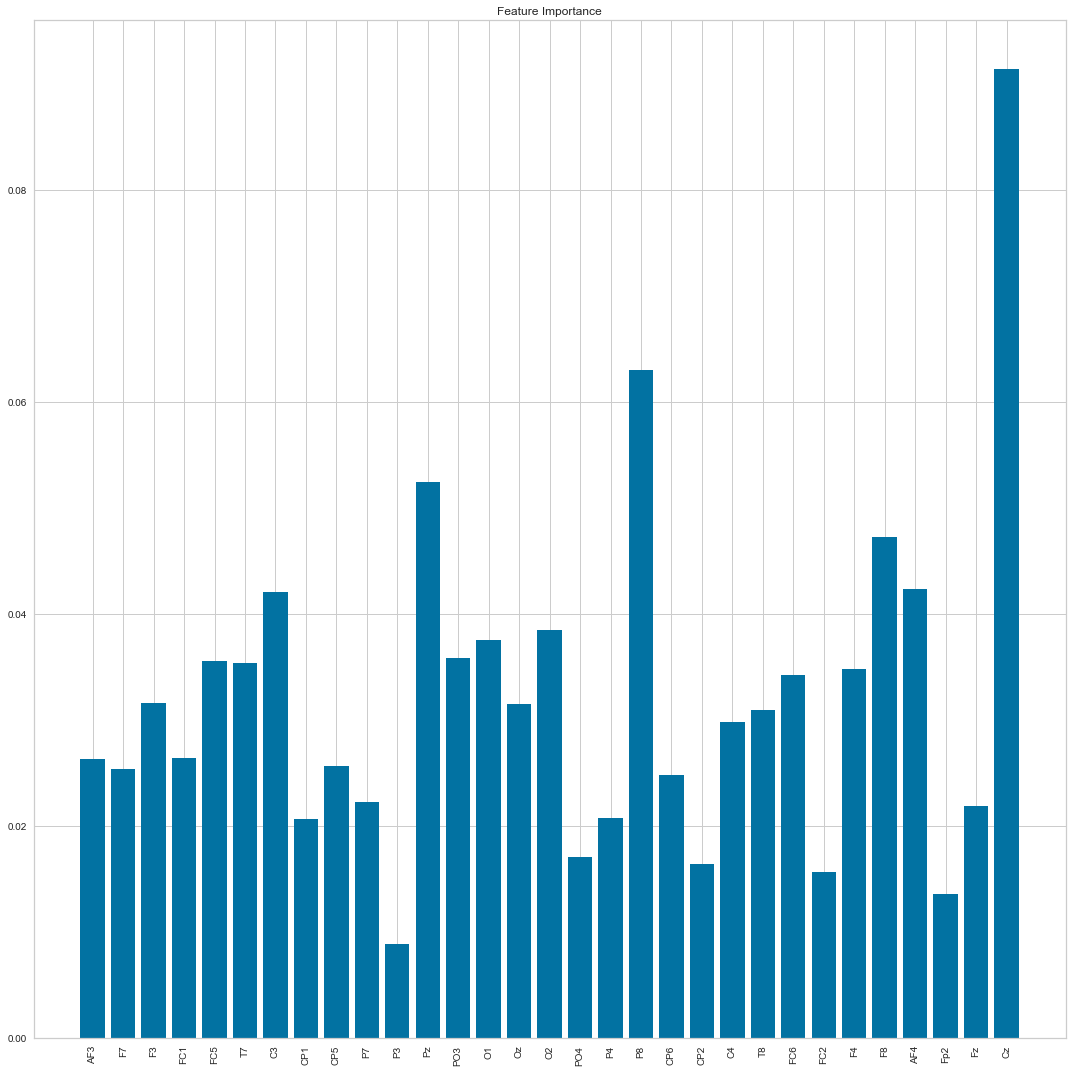

In [99]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

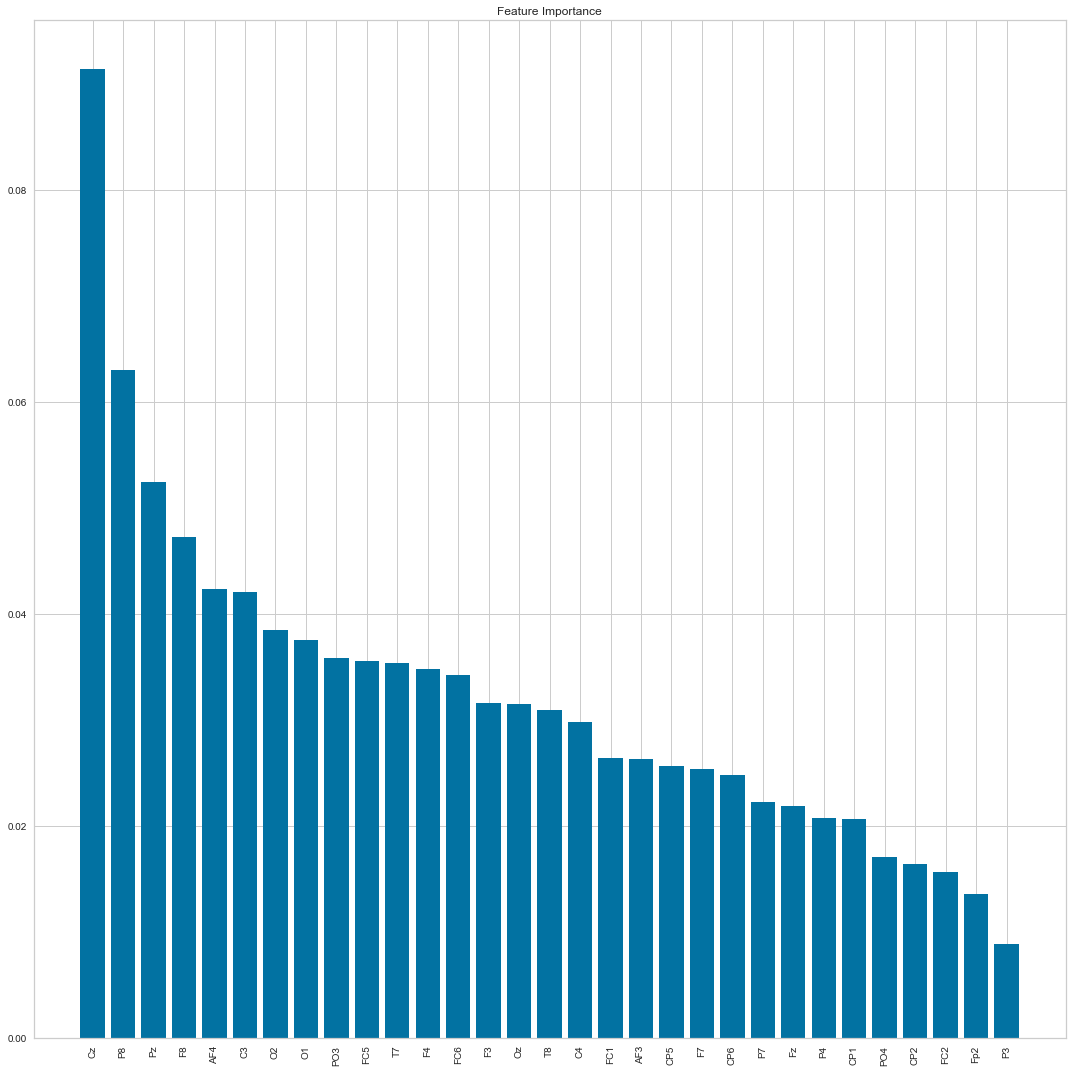

In [100]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [101]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02633327, 0.02532272, 0.03158959, 0.02640682,
       0.03553203, 0.03535761, 0.04210673, 0.02065931, 0.02561736,
       0.02228599, 0.0088761 , 0.05248682, 0.03581443, 0.03752212,
       0.03154176, 0.03848861, 0.01705359, 0.02076259, 0.06303623,
       0.02475721, 0.01640726, 0.02984528, 0.03098348, 0.03422875,
       0.01568817, 0.03482029, 0.04726173, 0.04234564, 0.01356438,
       0.02186255, 0.09144156])

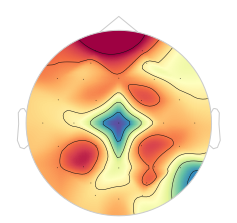

(<matplotlib.image.AxesImage at 0x21a3ed002b0>,
 <matplotlib.contour.QuadContourSet at 0x21a3ed00730>)

In [102]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h1>6. Spectral value Decomposition Entropy</h1>

In [103]:
svd_ent_pd['Y'] = 1
svd_ent['Y'] = 0

In [104]:
X1 = svd_ent.append(svd_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.458908,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,...,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873,0
1,0.411324,0.414599,0.380600,0.425593,0.406566,0.407422,0.380689,0.370346,0.360862,0.443841,...,0.456706,0.431810,0.323067,0.289243,0.421913,0.394608,0.394392,0.366379,0.388330,0
2,0.400829,0.379982,0.334224,0.415308,0.403070,0.358920,0.381000,0.286026,0.380852,0.426595,...,0.473060,0.419652,0.344523,0.316143,0.392976,0.342966,0.404395,0.325343,0.401927,0
3,0.439308,0.451048,0.157905,0.205591,0.415331,0.388264,0.395034,0.245785,0.365359,0.384823,...,0.469259,0.313625,0.331127,0.324850,0.411708,0.373565,0.461879,0.326678,0.374859,0
4,0.412547,0.489168,0.220988,0.203713,0.422089,0.371353,0.379650,0.290553,0.305548,0.394760,...,0.487639,0.278034,0.207001,0.331666,0.482274,0.469526,0.436674,0.376017,0.397347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.404192,0.386799,0.371048,0.383371,0.343115,0.384002,0.406277,0.383592,0.309320,0.312918,...,0.467811,0.434430,0.355451,0.375532,0.380173,0.383977,0.360012,0.358128,0.277915,1
6275,0.399722,0.401286,0.338736,0.407443,0.365319,0.321943,0.393499,0.299190,0.318177,0.327812,...,0.515657,0.402440,0.348840,0.372743,0.347485,0.423138,0.333852,0.349061,0.330078,1
6276,0.447717,0.405843,0.350403,0.406756,0.338481,0.320692,0.393909,0.244860,0.333633,0.347301,...,0.526905,0.406312,0.313729,0.369771,0.356604,0.430044,0.323590,0.328502,0.302489,1
6277,0.426830,0.390401,0.353739,0.392163,0.351291,0.366369,0.376871,0.313853,0.350914,0.338432,...,0.525848,0.407883,0.347614,0.328273,0.366151,0.375537,0.348391,0.350342,0.329648,1


In [105]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,3347
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [106]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9700,0.9937,0.9749,0.9684,0.9715,0.9398,0.9400,0.0253
et,Extra Trees Classifier,0.9666,0.9943,0.9645,0.9719,0.9681,0.9330,0.9332,0.0767
xgboost,Extreme Gradient Boosting,0.9622,0.9944,0.9658,0.9626,0.9641,0.9243,0.9244,0.2627
lightgbm,Light Gradient Boosting Machine,0.9606,0.9933,0.9610,0.9640,0.9624,0.9211,0.9213,0.0587
rf,Random Forest Classifier,0.9477,0.9888,0.9467,0.9536,0.9500,0.8951,0.8955,0.1460
qda,Quadratic Discriminant Analysis,0.9438,0.9795,0.9381,0.9543,0.9460,0.8874,0.8878,0.0040
gbc,Gradient Boosting Classifier,0.9204,0.9740,0.9220,0.9267,0.9240,0.8403,0.8411,0.2947
dt,Decision Tree Classifier,0.8601,0.8599,0.8636,0.8696,0.8662,0.7195,0.7202,0.0153
ada,Ada Boost Classifier,0.8510,0.9237,0.8753,0.8472,0.8606,0.7006,0.7018,0.0713
lda,Linear Discriminant Analysis,0.7857,0.8653,0.7999,0.7945,0.7967,0.5700,0.5709,0.0047


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9795,0.9987,0.9675,0.9933,0.9803,0.9590,0.9594
1,0.9727,0.9975,0.9935,0.9562,0.9745,0.9451,0.9459
2,0.9625,0.9968,0.9675,0.9613,0.9644,0.9247,0.9247
3,0.9625,0.9974,0.9740,0.9554,0.9646,0.9246,0.9248
4,0.9693,0.9899,0.9805,0.9618,0.9711,0.9383,0.9385
5,0.9590,0.9848,0.9675,0.9551,0.9613,0.9178,0.9179
6,0.9659,0.9931,0.9610,0.9737,0.9673,0.9316,0.9317
7,0.9659,0.9862,0.9675,0.9675,0.9675,0.9316,0.9316
8,0.9693,0.9900,0.9675,0.9739,0.9707,0.9384,0.9384


In [108]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9795,0.9991,0.9740,0.9868,0.9804,0.9590,0.9591
1,0.9693,0.9991,0.9935,0.9503,0.9714,0.9383,0.9393
2,0.9693,0.9963,0.9740,0.9677,0.9709,0.9384,0.9384
3,0.9659,0.9977,0.9805,0.9557,0.9679,0.9315,0.9318
4,0.9625,0.9894,0.9740,0.9554,0.9646,0.9246,0.9248
5,0.9454,0.9873,0.9610,0.9367,0.9487,0.8903,0.8907
6,0.9761,0.9974,0.9740,0.9804,0.9772,0.9521,0.9521
7,0.9727,0.9899,0.9740,0.9740,0.9740,0.9452,0.9452
8,0.9590,0.9933,0.9610,0.9610,0.9610,0.9179,0.9179


In [109]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [110]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')


<h2> KNN giving 97.02% accuracy </h2>

In [111]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9659,0.9954,0.9610,0.9737,0.9673,0.9316,0.9317
1,0.9693,0.9940,0.9805,0.9618,0.9711,0.9383,0.9385
2,0.9625,0.9941,0.9545,0.9735,0.9639,0.9248,0.9250
3,0.9625,0.9950,0.9610,0.9673,0.9642,0.9247,0.9248
4,0.9693,0.9937,0.9870,0.9560,0.9712,0.9383,0.9388
5,0.9556,0.9924,0.9481,0.9669,0.9574,0.9111,0.9113
6,0.9590,0.9950,0.9675,0.9551,0.9613,0.9178,0.9179
7,0.9488,0.9908,0.9610,0.9427,0.9518,0.8972,0.8974
8,0.9659,0.9959,0.9805,0.9557,0.9679,0.9315,0.9318


In [112]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [113]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,0.354649,...,0.435934,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873
1,0.414599,0.380600,0.425593,0.406566,0.407422,0.380689,0.370346,0.360862,0.443841,0.433118,...,0.430898,0.456706,0.431810,0.323067,0.289243,0.421913,0.394608,0.394392,0.366379,0.388330
2,0.379982,0.334224,0.415308,0.403070,0.358920,0.381000,0.286026,0.380852,0.426595,0.415097,...,0.439087,0.473060,0.419652,0.344523,0.316143,0.392976,0.342966,0.404395,0.325343,0.401927
3,0.451048,0.157905,0.205591,0.415331,0.388264,0.395034,0.245785,0.365359,0.384823,0.405134,...,0.420480,0.469259,0.313625,0.331127,0.324850,0.411708,0.373565,0.461879,0.326678,0.374859
4,0.489168,0.220988,0.203713,0.422089,0.371353,0.379650,0.290553,0.305548,0.394760,0.435556,...,0.442655,0.487639,0.278034,0.207001,0.331666,0.482274,0.469526,0.436674,0.376017,0.397347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.386799,0.371048,0.383371,0.343115,0.384002,0.406277,0.383592,0.309320,0.312918,0.334654,...,0.362701,0.467811,0.434430,0.355451,0.375532,0.380173,0.383977,0.360012,0.358128,0.277915
6275,0.401286,0.338736,0.407443,0.365319,0.321943,0.393499,0.299190,0.318177,0.327812,0.349505,...,0.365816,0.515657,0.402440,0.348840,0.372743,0.347485,0.423138,0.333852,0.349061,0.330078
6276,0.405843,0.350403,0.406756,0.338481,0.320692,0.393909,0.244860,0.333633,0.347301,0.343575,...,0.392509,0.526905,0.406312,0.313729,0.369771,0.356604,0.430044,0.323590,0.328502,0.302489
6277,0.390401,0.353739,0.392163,0.351291,0.366369,0.376871,0.313853,0.350914,0.338432,0.318828,...,0.427820,0.525848,0.407883,0.347614,0.328273,0.366151,0.375537,0.348391,0.350342,0.329648


In [114]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [116]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.453581,0.555064,0.491068,0.441644,0.580133,0.549310,0.530615,0.444547,0.464908,0.510965,...,0.547940,0.549448,0.530424,0.473045,0.494809,0.507955,0.529841,0.483448,0.475999,0.476592
1796,0.497741,0.486297,0.487786,0.335331,0.391089,0.477146,0.457888,0.353458,0.450674,0.393975,...,0.346025,0.492229,0.336121,0.528852,0.414314,0.361095,0.472151,0.439338,0.449723,0.502531
6232,0.393806,0.504215,0.438135,0.280805,0.329101,0.406776,0.316313,0.338362,0.339399,0.342889,...,0.467565,0.557312,0.509295,0.354629,0.429214,0.405641,0.356163,0.384120,0.306124,0.323853
4868,0.442170,0.377915,0.423458,0.414229,0.370700,0.408253,0.373278,0.380190,0.389898,0.422183,...,0.378168,0.466846,0.453401,0.417296,0.446234,0.482362,0.469474,0.499347,0.410977,0.403238
2715,0.573486,0.558513,0.509178,0.378794,0.561092,0.490139,0.409891,0.416408,0.463322,0.499894,...,0.475158,0.490580,0.482306,0.485130,0.527462,0.546521,0.554542,0.558398,0.321327,0.447362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.366783,0.357570,0.386218,0.314438,0.350370,0.381873,0.346323,0.387923,0.363653,0.384044,...,0.450563,0.430551,0.411609,0.382907,0.386138,0.386876,0.354150,0.383208,0.355714,0.367081
4060,0.431912,0.428447,0.444637,0.348446,0.473221,0.450252,0.431832,0.332778,0.412061,0.417666,...,0.363469,0.472391,0.409675,0.373970,0.492454,0.387482,0.500242,0.451248,0.351435,0.394485
1346,0.507032,0.435534,0.427731,0.407902,0.370823,0.394006,0.352228,0.359697,0.375406,0.369218,...,0.369783,0.479764,0.385549,0.395722,0.440332,0.442481,0.454539,0.434424,0.395500,0.391224
3454,0.491766,0.477581,0.406540,0.358736,0.372938,0.406054,0.313592,0.341985,0.273433,0.320867,...,0.290170,0.458188,0.333738,0.318485,0.421305,0.470987,0.511058,0.431353,0.345787,0.376924


<h2>KNN</h2>

In [117]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.954172696575012


<h2>XGBoost</h2>


In [118]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.65%


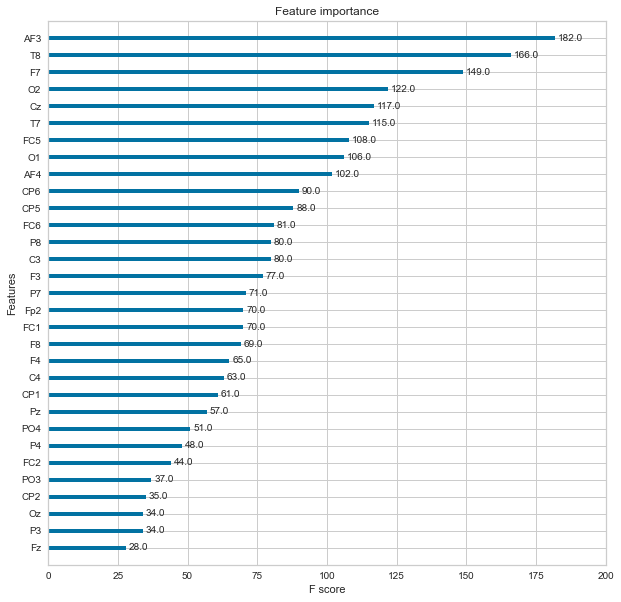

In [119]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

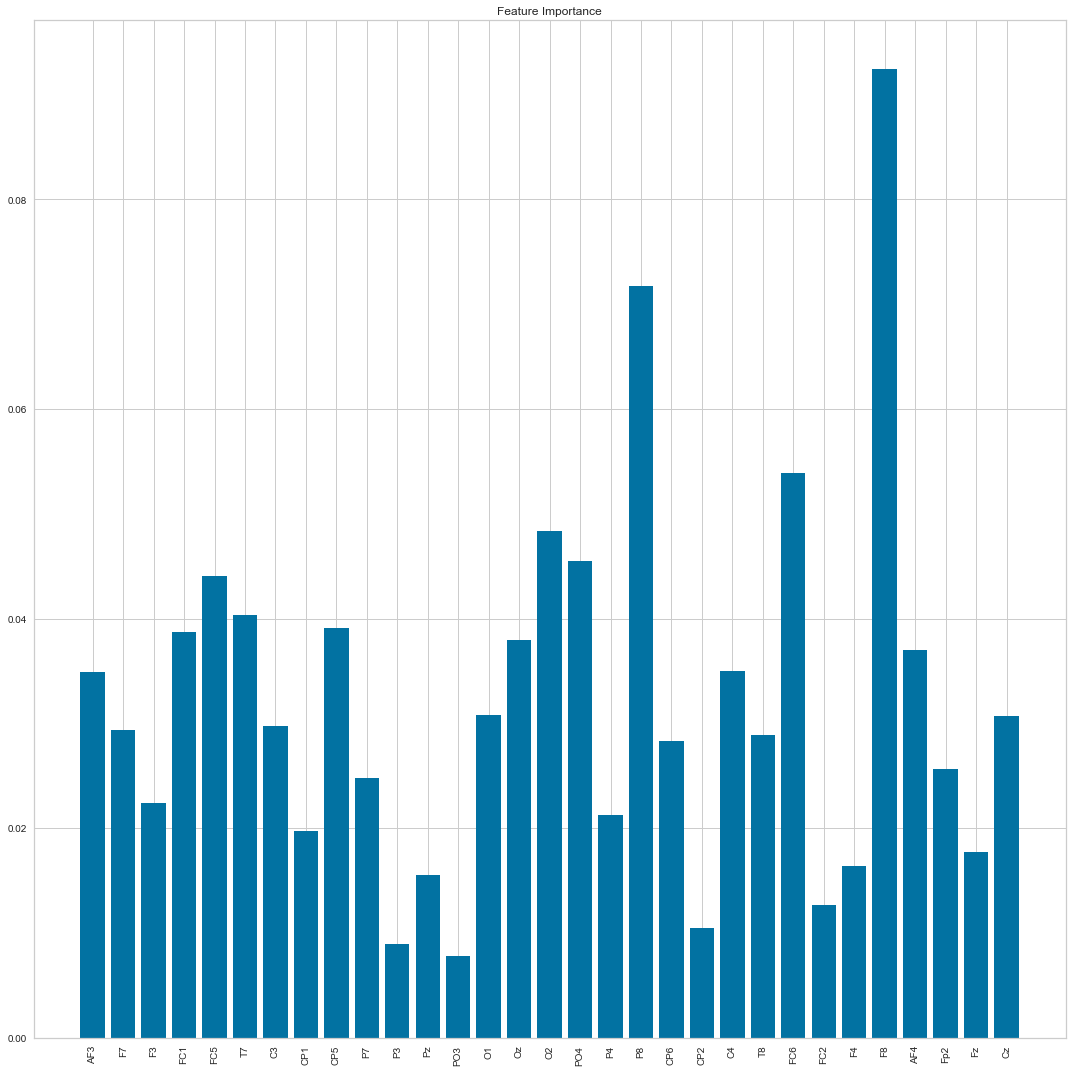

In [120]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

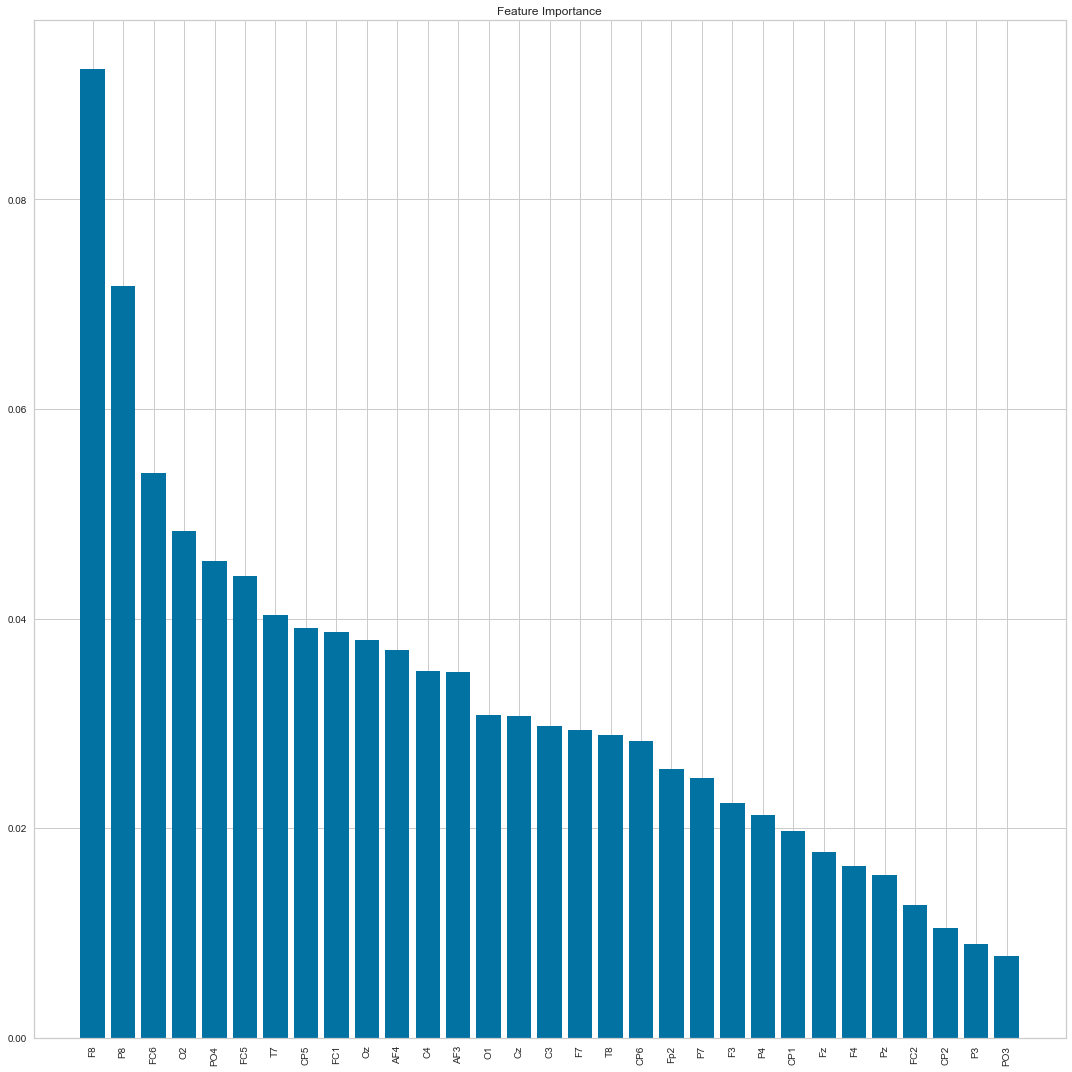

In [121]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [122]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03486052, 0.02940465, 0.02235363, 0.03869035,
       0.04404716, 0.04030038, 0.02974357, 0.01975369, 0.03914015,
       0.02475164, 0.00894974, 0.0155251 , 0.00778101, 0.03078042,
       0.03790969, 0.04839287, 0.04548742, 0.02123982, 0.07174894,
       0.02831058, 0.01051519, 0.03500236, 0.02887724, 0.053863  ,
       0.01266492, 0.01641147, 0.09243385, 0.03696454, 0.02567679,
       0.01772416, 0.0306952 ])

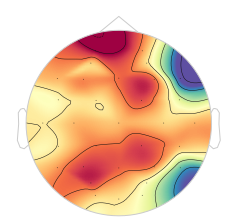

(<matplotlib.image.AxesImage at 0x21a3f882970>,
 <matplotlib.contour.QuadContourSet at 0x21a3f882d90>)

In [123]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>7. Approximate Entropy</h2>

In [124]:
app_ent_pd['Y'] = 1
app_ent['Y'] = 0

In [125]:
X1 = app_ent.append(app_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.608399,0.592641,0.499266,0.590276,0.541234,0.547793,0.526568,0.440637,0.428584,0.590560,...,0.611423,0.573341,0.390734,0.499534,0.586011,0.575989,0.573572,0.564809,0.520519,0
1,0.566791,0.558532,0.520237,0.564580,0.558777,0.527475,0.518760,0.558080,0.539996,0.605273,...,0.596891,0.570877,0.544744,0.433208,0.588961,0.571814,0.567293,0.539248,0.555489,0
2,0.572378,0.556140,0.515648,0.590065,0.565526,0.526411,0.567052,0.528322,0.568680,0.597191,...,0.601560,0.576300,0.559705,0.497426,0.581306,0.499141,0.585940,0.466888,0.576116,0
3,0.575985,0.571335,0.171185,0.246775,0.570195,0.569281,0.602097,0.368770,0.576832,0.571605,...,0.603582,0.541220,0.529135,0.490263,0.559413,0.541992,0.609564,0.480586,0.554815,0
4,0.550112,0.604782,0.253414,0.224545,0.575899,0.528252,0.573964,0.435539,0.475884,0.568827,...,0.626087,0.410623,0.241777,0.510987,0.534565,0.577120,0.588843,0.542675,0.576028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.578538,0.566877,0.557964,0.544362,0.485610,0.544017,0.543987,0.566903,0.496141,0.495219,...,0.585403,0.600368,0.531114,0.554932,0.544872,0.539341,0.532730,0.531139,0.441330,1
6275,0.576390,0.581768,0.521416,0.543975,0.531870,0.493957,0.527326,0.505685,0.507687,0.487684,...,0.568992,0.563945,0.520259,0.533470,0.525472,0.567676,0.501691,0.528778,0.482428,1
6276,0.608852,0.575105,0.496966,0.537429,0.496517,0.491509,0.553539,0.351247,0.504564,0.508289,...,0.585384,0.553090,0.461551,0.525068,0.531601,0.570975,0.466250,0.512750,0.457298,1
6277,0.610417,0.544732,0.513500,0.551044,0.551260,0.542377,0.561109,0.506661,0.499666,0.477277,...,0.572844,0.546218,0.552209,0.514290,0.532402,0.562584,0.523040,0.509795,0.498221,1


In [126]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,1001
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [127]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8733,0.9448,0.8752,0.8816,0.8780,0.7462,0.7469,0.2987
lightgbm,Light Gradient Boosting Machine,0.8710,0.9430,0.8708,0.8810,0.8755,0.7417,0.7424,0.0587
et,Extra Trees Classifier,0.8673,0.9418,0.8669,0.8778,0.8720,0.7344,0.7351,0.0900
knn,K Neighbors Classifier,0.8664,0.9408,0.9250,0.8369,0.8784,0.7311,0.7362,0.0287
rf,Random Forest Classifier,0.8480,0.9252,0.8420,0.8637,0.8524,0.6958,0.6966,0.1507
gbc,Gradient Boosting Classifier,0.8180,0.8982,0.8219,0.8278,0.8246,0.6354,0.6358,0.2973
qda,Quadratic Discriminant Analysis,0.7825,0.8875,0.9088,0.7366,0.8134,0.5596,0.5781,0.0040
ada,Ada Boost Classifier,0.7461,0.8268,0.7648,0.7529,0.7584,0.4909,0.4915,0.0733
dt,Decision Tree Classifier,0.7126,0.7121,0.7237,0.7257,0.7241,0.4242,0.4249,0.0173
ridge,Ridge Classifier,0.6853,0.0000,0.7124,0.6938,0.7024,0.3687,0.3695,0.0033


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1001, reg_alpha=0, ...)

In [128]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8430,0.9196,0.8889,0.8242,0.8553,0.6842,0.6866
1,0.8464,0.9296,0.8824,0.8333,0.8571,0.6914,0.6927
2,0.8737,0.9463,0.9216,0.8494,0.8840,0.7459,0.7489
3,0.8942,0.9588,0.9477,0.8631,0.9034,0.7870,0.7912
4,0.8191,0.9222,0.8889,0.7907,0.8369,0.6354,0.6409
5,0.9113,0.9594,0.9542,0.8848,0.9182,0.8215,0.8243
6,0.8771,0.9515,0.9085,0.8634,0.8854,0.7532,0.7543
7,0.8396,0.9329,0.9150,0.8046,0.8563,0.6765,0.6837
8,0.8805,0.9456,0.9150,0.8642,0.8889,0.7600,0.7614


In [129]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8669,0.9380,0.9346,0.8314,0.8800,0.7317,0.7380
1,0.8737,0.9579,0.9346,0.8412,0.8854,0.7456,0.7508
2,0.8771,0.9513,0.9608,0.8305,0.8909,0.7520,0.7625
3,0.8976,0.9572,0.9477,0.8683,0.9062,0.7939,0.7976
4,0.8635,0.9577,0.9542,0.8156,0.8795,0.7242,0.7362
5,0.8942,0.9560,0.9216,0.8812,0.9010,0.7875,0.7884
6,0.8874,0.9674,0.9542,0.8488,0.8985,0.7730,0.7797
7,0.8362,0.9400,0.9281,0.7933,0.8554,0.6691,0.6801
8,0.8805,0.9491,0.9346,0.8512,0.8910,0.7595,0.7636


In [130]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [131]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
                     weights='distance')


In [132]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8737,0.9433,0.8627,0.8919,0.8771,0.7473,0.7478
1,0.8737,0.9439,0.9085,0.8580,0.8825,0.7462,0.7477
2,0.8498,0.9427,0.8497,0.8609,0.8553,0.6992,0.6993
3,0.8737,0.9515,0.8497,0.9028,0.8754,0.7476,0.7490
4,0.8703,0.9532,0.8693,0.8808,0.8750,0.7403,0.7403
5,0.8942,0.9442,0.8562,0.9357,0.8942,0.7888,0.7919
6,0.8635,0.9431,0.8824,0.8599,0.8710,0.7261,0.7264
7,0.9078,0.9479,0.9085,0.9145,0.9115,0.8154,0.8154
8,0.8840,0.9551,0.8693,0.9048,0.8867,0.7679,0.7685


In [133]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [135]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8557645923781958


In [136]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.71%


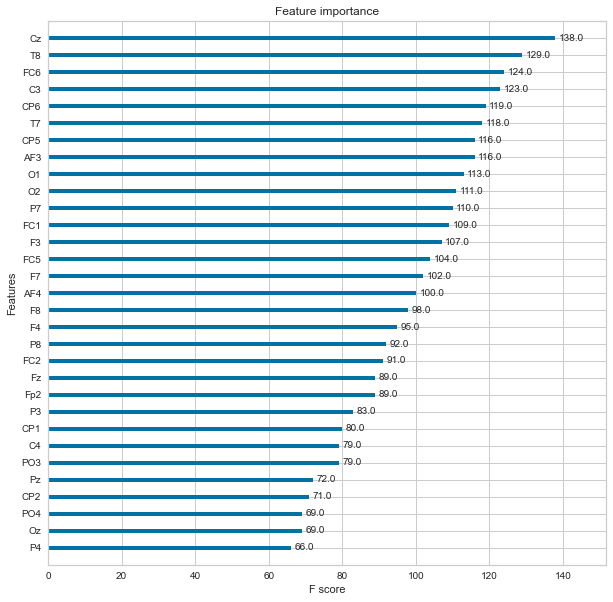

In [137]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

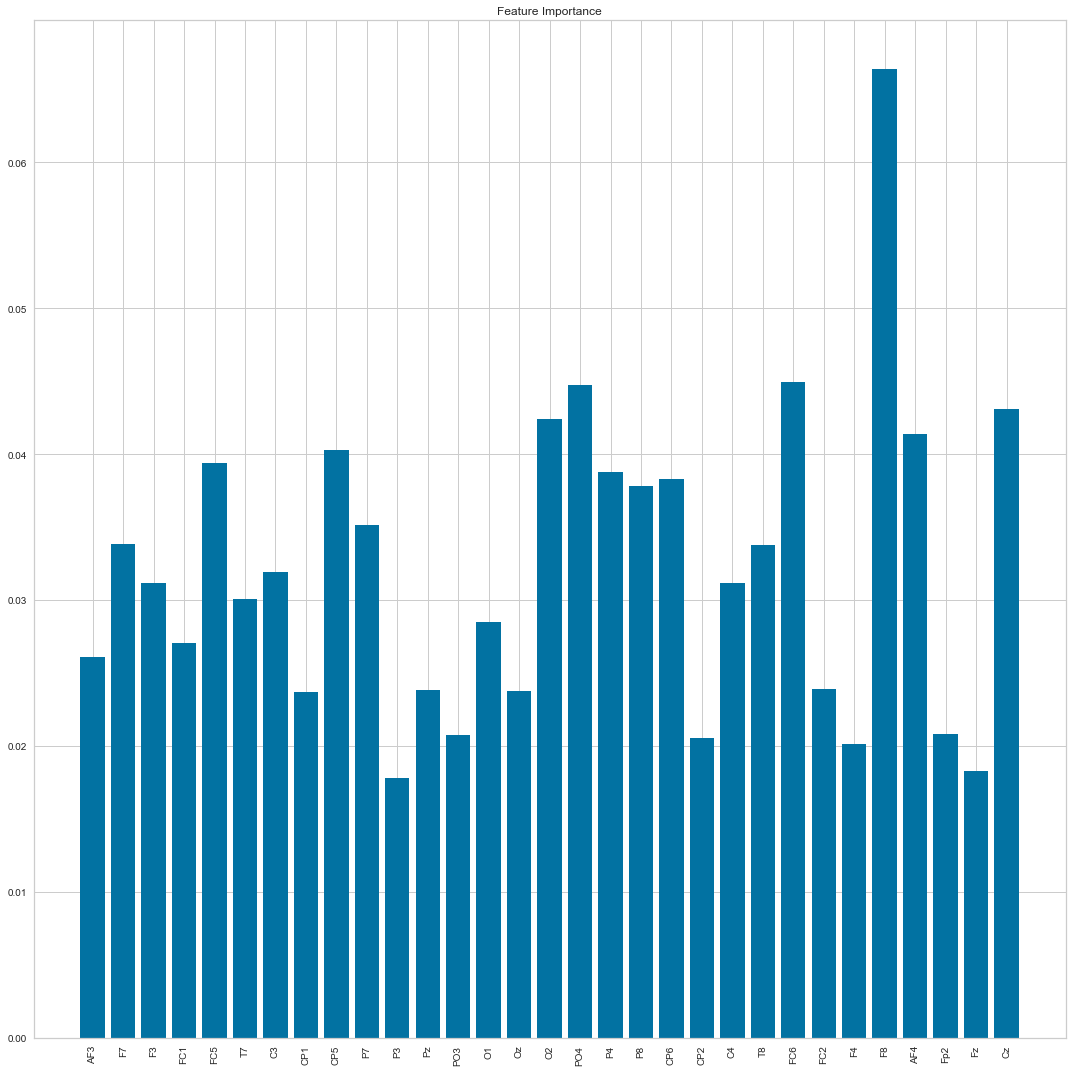

In [138]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

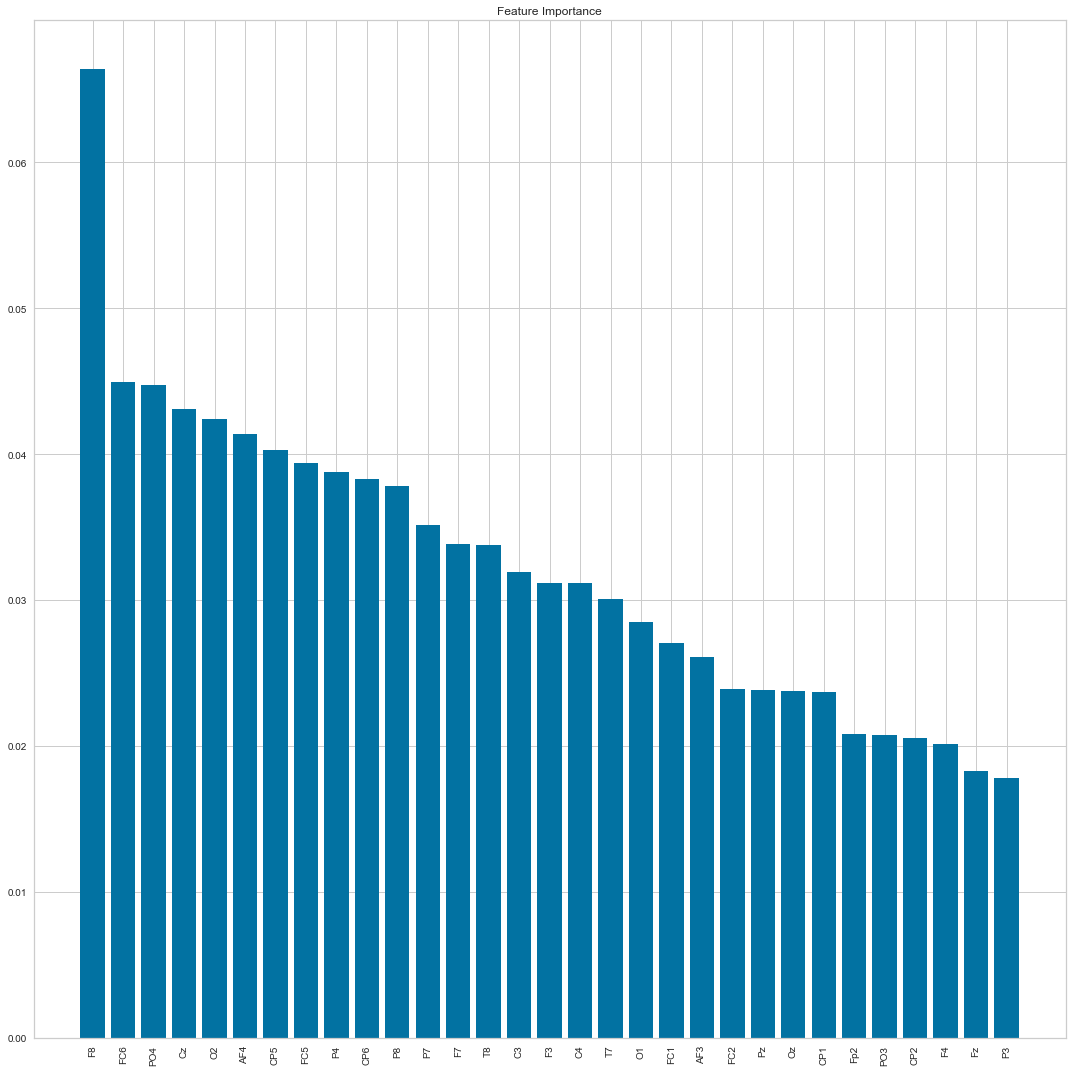

In [139]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [140]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02611073, 0.03385995, 0.03118491, 0.02709418,
       0.03940449, 0.03004516, 0.03190646, 0.02370564, 0.04028547,
       0.03514466, 0.0178119 , 0.02381397, 0.02076916, 0.02852711,
       0.02374086, 0.0424427 , 0.04473665, 0.03879356, 0.03778875,
       0.03828388, 0.02057204, 0.03115974, 0.03375683, 0.04495878,
       0.02390127, 0.0201616 , 0.0664112 , 0.04140559, 0.02082356,
       0.01827493, 0.04312432])

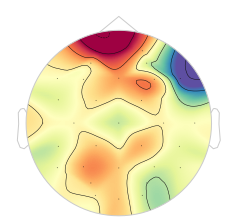

(<matplotlib.image.AxesImage at 0x21a389daee0>,
 <matplotlib.contour.QuadContourSet at 0x21a389e01c0>)

In [141]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>8. Sample Entropy</h2>

In [142]:
samp_ent_pd['Y'] = 1
samp_ent['Y'] = 0

In [143]:
X1 = samp_ent.append(samp_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.582628,0.614241,0.447238,0.569299,0.488091,0.532631,0.485144,0.381798,0.374451,0.581432,...,0.597126,0.554783,0.351066,0.433761,0.553919,0.566720,0.530955,0.508668,0.490510,0
1,0.518606,0.529751,0.490815,0.541657,0.528541,0.528217,0.452064,0.489272,0.476449,0.599002,...,0.586393,0.579979,0.504587,0.365115,0.544656,0.526249,0.524991,0.513861,0.545209,0
2,0.529254,0.525918,0.469553,0.579399,0.538583,0.495733,0.515129,0.485139,0.493497,0.573976,...,0.599322,0.565178,0.510866,0.437872,0.547116,0.446310,0.543188,0.436248,0.570385,0
3,0.525339,0.560698,0.176922,0.171750,0.546701,0.532314,0.564426,0.335116,0.542199,0.543894,...,0.631142,0.498164,0.471418,0.443837,0.532140,0.509410,0.597766,0.459066,0.546474,0
4,0.468960,0.547199,0.206589,0.154050,0.576227,0.486748,0.526706,0.394075,0.426373,0.553421,...,0.617176,0.364722,0.189093,0.458908,0.495060,0.551502,0.585212,0.537097,0.573396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.551972,0.506983,0.498177,0.495006,0.452864,0.523713,0.530058,0.550895,0.447004,0.484957,...,0.583483,0.568338,0.483054,0.551637,0.499202,0.526696,0.470620,0.487647,0.398386,1
6275,0.554292,0.565043,0.436986,0.460048,0.505284,0.451016,0.472325,0.477289,0.481171,0.461092,...,0.573431,0.525219,0.425589,0.493168,0.467250,0.550563,0.407647,0.445311,0.427315,1
6276,0.601012,0.545132,0.460941,0.471825,0.454625,0.456143,0.492272,0.304439,0.449840,0.467862,...,0.581307,0.509499,0.370139,0.476546,0.461224,0.519993,0.380484,0.433237,0.399651,1
6277,0.584128,0.508398,0.469134,0.479952,0.511647,0.482804,0.511025,0.441713,0.435344,0.396779,...,0.523511,0.521891,0.495831,0.464355,0.463380,0.526714,0.446802,0.471085,0.437299,1


In [144]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,179
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [145]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9040,0.9635,0.9377,0.8847,0.9102,0.8072,0.8093,0.0327
xgboost,Extreme Gradient Boosting,0.8949,0.9595,0.9049,0.8944,0.8993,0.7893,0.7899,0.2927
et,Extra Trees Classifier,0.8922,0.9585,0.9018,0.8925,0.8968,0.7839,0.7846,0.0860
lightgbm,Light Gradient Boosting Machine,0.8883,0.9563,0.8895,0.8952,0.8920,0.7763,0.7769,0.0620
rf,Random Forest Classifier,0.8755,0.9462,0.8794,0.8814,0.8801,0.7507,0.7513,0.1573
qda,Quadratic Discriminant Analysis,0.8437,0.9225,0.9018,0.8167,0.8569,0.6856,0.6902,0.0040
gbc,Gradient Boosting Classifier,0.8389,0.9208,0.8501,0.8422,0.8456,0.6772,0.6782,0.2953
ada,Ada Boost Classifier,0.7772,0.8545,0.8018,0.7771,0.7889,0.5533,0.5542,0.0713
dt,Decision Tree Classifier,0.7606,0.7602,0.7725,0.7687,0.7701,0.5204,0.5212,0.0140
ridge,Ridge Classifier,0.7192,0.0000,0.7243,0.7327,0.7279,0.4379,0.4386,0.0033


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [146]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9698,0.9605,0.8795,0.9182,0.8216,0.8255
1,0.9420,0.9738,0.9737,0.9193,0.9457,0.8835,0.8852
2,0.8669,0.9453,0.9079,0.8466,0.8762,0.7327,0.7347
3,0.8874,0.9597,0.9342,0.8606,0.8959,0.7737,0.7768
4,0.8635,0.9417,0.8882,0.8544,0.8710,0.7262,0.7268
5,0.9010,0.9421,0.9408,0.8773,0.9079,0.8012,0.8035
6,0.9147,0.9730,0.9276,0.9097,0.9186,0.8290,0.8292
7,0.9283,0.9735,0.9474,0.9172,0.9320,0.8563,0.8568
8,0.8976,0.9716,0.9408,0.8720,0.9051,0.7943,0.7970


In [147]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9147,0.9713,0.9539,0.8896,0.9206,0.8286,0.8310
1,0.9215,0.9828,0.9605,0.8957,0.9270,0.8423,0.8447
2,0.8874,0.9480,0.9276,0.8650,0.8952,0.7738,0.7760
3,0.8669,0.9525,0.9276,0.8343,0.8785,0.7322,0.7373
4,0.8942,0.9496,0.9342,0.8712,0.9016,0.7875,0.7897
5,0.9113,0.9546,0.9474,0.8889,0.9172,0.8218,0.8238
6,0.9283,0.9776,0.9474,0.9172,0.9320,0.8563,0.8568
7,0.9215,0.9772,0.9671,0.8909,0.9274,0.8423,0.8456
8,0.9044,0.9713,0.9474,0.8780,0.9114,0.8080,0.8108


In [148]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [149]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')


In [150]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8840,0.9589,0.9079,0.8734,0.8903,0.7672,0.7679
1,0.8840,0.9513,0.9079,0.8734,0.8903,0.7672,0.7679
2,0.9044,0.9462,0.9276,0.8924,0.9097,0.8083,0.8090
3,0.8805,0.9544,0.8947,0.8774,0.8860,0.7606,0.7607
4,0.8805,0.9497,0.9145,0.8634,0.8882,0.7602,0.7617
5,0.8635,0.9426,0.8750,0.8636,0.8693,0.7264,0.7265
6,0.9352,0.9861,0.9342,0.9404,0.9373,0.8702,0.8702
7,0.9010,0.9598,0.8750,0.9301,0.9017,0.8022,0.8037
8,0.9078,0.9773,0.9013,0.9195,0.9103,0.8156,0.8158


In [151]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [153]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8822961890979257


In [154]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.98%


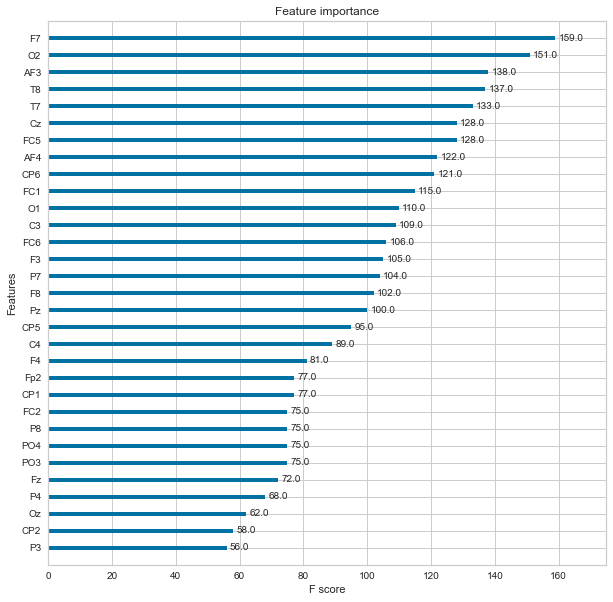

In [155]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

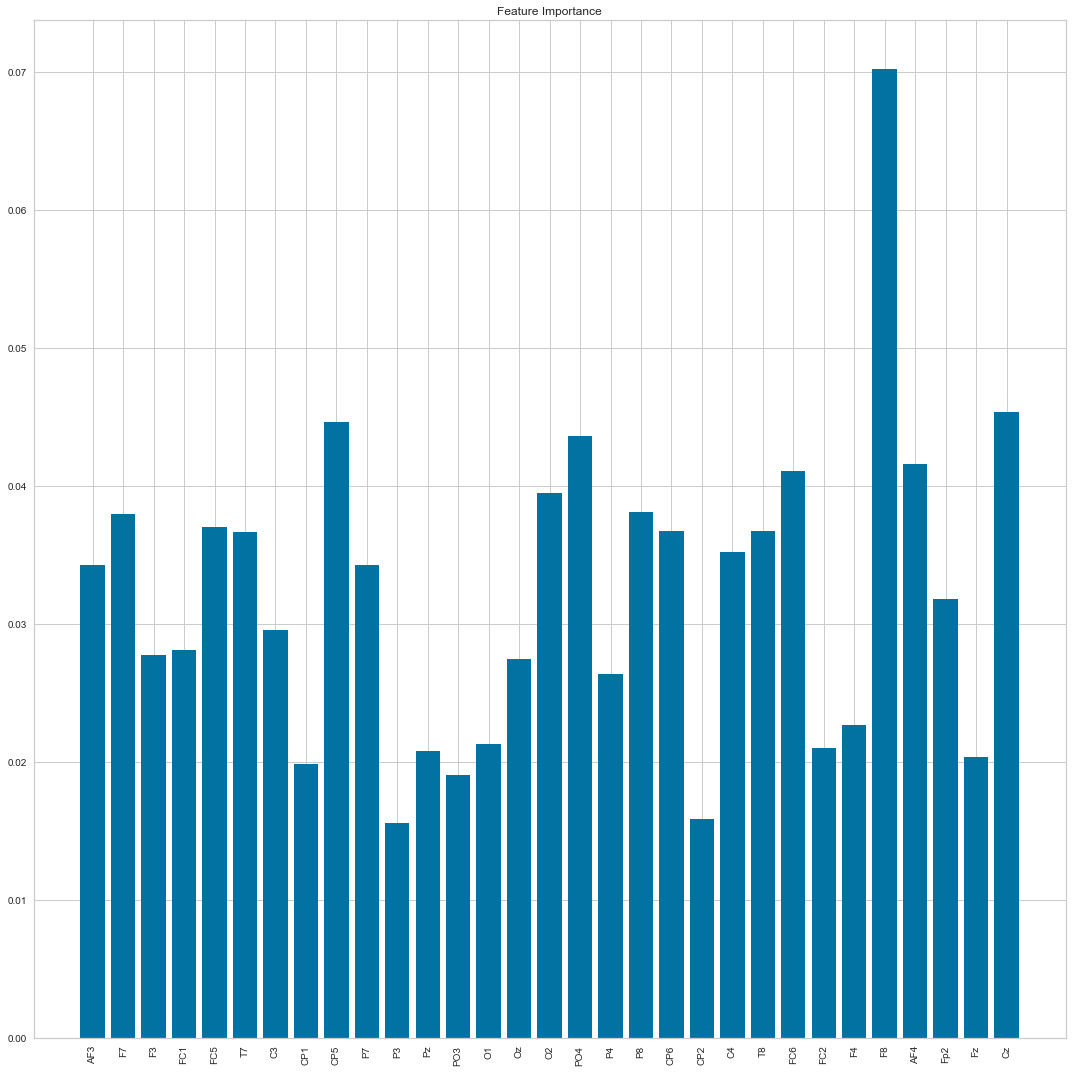

In [156]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

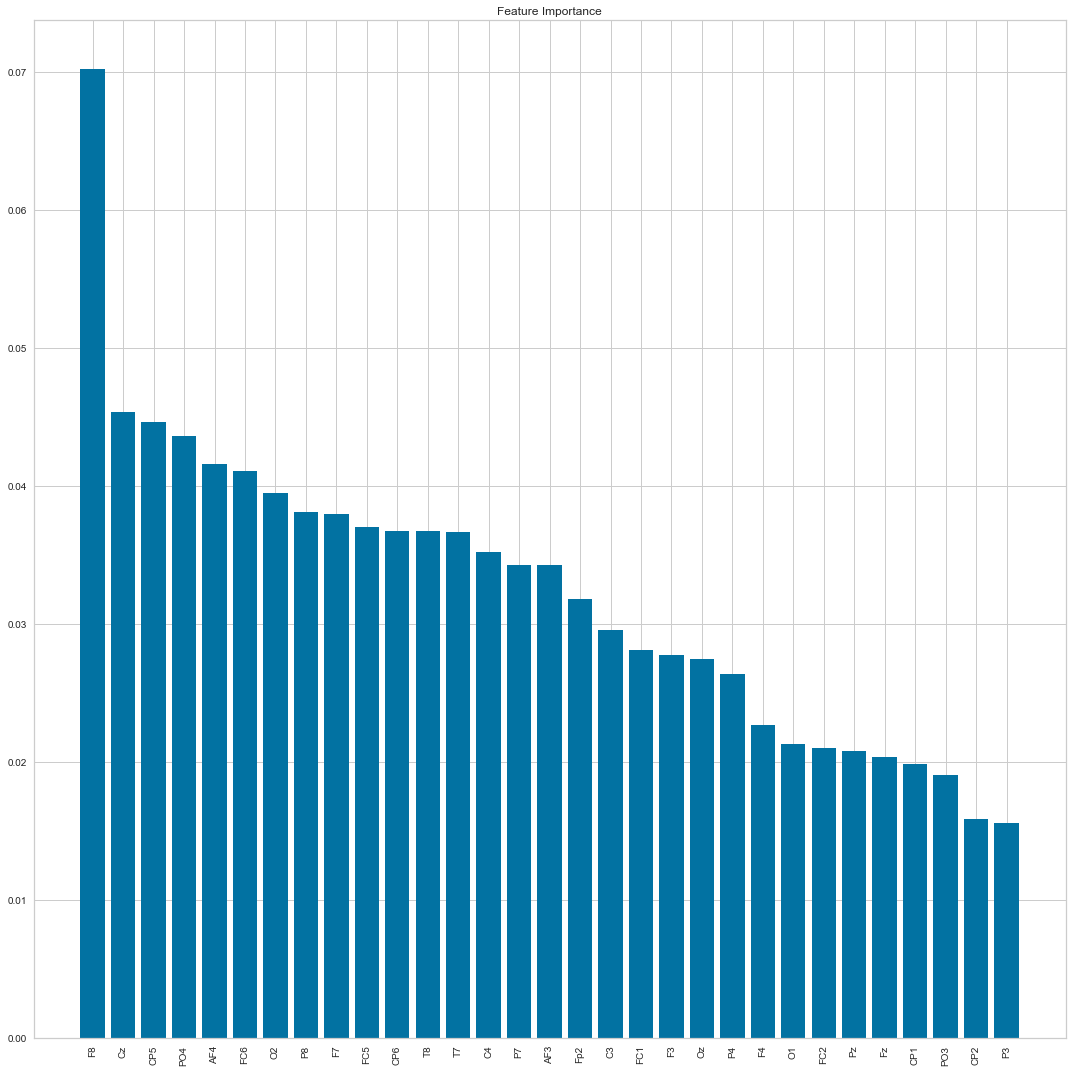

In [157]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [158]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.0342682 , 0.03793034, 0.027751  , 0.0280827 ,
       0.03698209, 0.03661774, 0.02953229, 0.01983204, 0.04459646,
       0.03427611, 0.01553005, 0.02077563, 0.01905514, 0.02129152,
       0.02742113, 0.03946107, 0.04359097, 0.02636561, 0.03809497,
       0.03675918, 0.01585245, 0.03521385, 0.03669139, 0.04107608,
       0.02099041, 0.02263198, 0.07021394, 0.04161643, 0.03179996,
       0.02038466, 0.04531468])

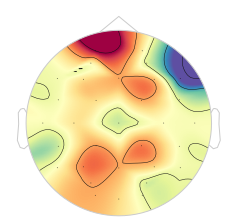

(<matplotlib.image.AxesImage at 0x21a3f63db80>,
 <matplotlib.contour.QuadContourSet at 0x21a3f63dfd0>)

In [159]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>9. Hjorth<h2>

In [160]:
hjorth_pd['Y'] = 1
hjorth['Y'] = 0

In [161]:
X1 = hjorth.append(hjorth_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,"(0.23509864086709523, 1.7016537852093405)","(0.23899167891331521, 1.5730959093686714)","(0.13829447754749075, 2.5382437685299655)","(0.2108222510614329, 1.7761978590152312)","(0.18283999279027305, 1.8464558266319873)","(0.20005564336469434, 1.6262825664660134)","(0.18825840538570593, 1.7284094986118848)","(0.12791324920829938, 2.8858310625771324)","(0.10817970508672686, 3.374329789182818)","(0.21456907122910554, 1.6826796491497824)",...,"(0.24748191267708722, 1.4512692928818571)","(0.19012807796278516, 1.7457142730377542)","(0.09668225328402878, 3.5670174800592545)","(0.1275959191955173, 2.5605528499440684)","(0.19398163861503168, 2.0994309143846714)","(0.20222694457069704, 1.8302572991090222)","(0.171145649738761, 2.1589406931016364)","(0.17196857120631484, 1.7825439779375585)","(0.1560462235482291, 2.261030059537869)",0
1,"(0.18711960840515135, 1.999976069443521)","(0.1903882304668965, 1.9615879173983435)","(0.17278220852591103, 1.9090365470620296)","(0.20413553333799386, 1.737647098883773)","(0.18776925943842165, 1.848815118602632)","(0.19230711617743051, 1.698337497594444)","(0.1682588701215695, 1.9202174131707666)","(0.1580181501064073, 2.2145438339759607)","(0.15541550015317182, 2.2307165828838347)","(0.2198876132158746, 1.6038382356047638)",...,"(0.23523450092954123, 1.5442380827903883)","(0.2115655505378233, 1.6000289564782324)","(0.14821924594443095, 2.217798772910879)","(0.10769336286584594, 2.9524535752418704)","(0.20044998643027745, 1.8725441403225909)","(0.1802642123762777, 1.8164811004177435)","(0.1772631888491533, 1.9491154556880603)","(0.1772989484428979, 1.7648713822623423)","(0.17001132239156191, 2.056809300512017)",0
2,"(0.1834796139488647, 1.9931022510419858)","(0.17426520403176163, 2.171140452531)","(0.1443257691050267, 2.26948257079469)","(0.22489961203164788, 1.5335903251889382)","(0.18608037905670588, 1.9589001129772625)","(0.15553154355310245, 2.1052348794894735)","(0.17883128398807027, 1.7717727172880442)","(0.15307502628408973, 2.201280210425334)","(0.17569520149702603, 1.7877362246075073)","(0.20392306668678387, 1.73064633446246)",...,"(0.24677741408321185, 1.5484310092215667)","(0.198326570639699, 1.8281116800702975)","(0.1577178372528209, 2.199854478983585)","(0.12645869552701355, 2.720699561820734)","(0.17490966375132252, 1.9988630530867477)","(0.144998282313378, 2.1520508288934472)","(0.18608455751698305, 1.8834766495973916)","(0.12855777380843614, 2.558012272072641)","(0.18212431153119768, 1.9134847471149015)",0
3,"(0.2324431329907197, 1.576094022132658)","(0.22233730419867212, 1.7072944736727838)","(0.04990113455395791, 7.1068749402351274)","(0.07409558862773506, 5.036231232864246)","(0.19367342356175096, 1.7849497529171066)","(0.1793790388681656, 2.0408562068251324)","(0.1916839350000318, 1.6620050564335962)","(0.09226459510361736, 3.7513274506626164)","(0.1674131589759346, 1.8279455327945031)","(0.17328745024294814, 1.9219621257417128)",...,"(0.2431657915021434, 1.565601945556499)","(0.14741016009949592, 2.4401827289086593)","(0.15822488436915938, 2.1587636106556545)","(0.13267387716798812, 2.6985954459619914)","(0.18932810710582645, 2.0495246432109075)","(0.1668403888159787, 2.0474916553152283)","(0.23471273913679377, 1.6081645573617418)","(0.12850900953898123, 2.6508696928534268)","(0.16922079270125648, 2.096246896345672)",0
4,"(0.19011085434406105, 2.0954673687265477)","(0.2631756888985563, 1.5210012879962949)","(0.06979040675372188, 5.738772847123235)","(0.06395963058389682, 5.261278576167344)","(0.2030331593467536, 1.6470862317251465)","(0.15970715965168086, 2.44292693528758)","(0.17309455641409788, 2.0176523199811185)","(0.10874001496301688, 3.1976751365114517)","(0.11933601872335843, 2.5170620129713903)","(0.18184611155088576, 1.6955212909526751)",...,"(0.25948649003089447, 1.566057969439376)","(0.09955410656829292, 3.517547822737416)","(0.06824494043745409, 4.613123575734835)","(0.13706019801049407, 2.525524

In [162]:
X2 = X1.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.832327,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538
1,1.093548,1.075988,1.040909,0.970891,1.018292,0.945322,1.044238,1.186281,1.193066,0.911863,...,0.834781,0.889736,0.905797,1.183009,1.530073,1.036497,0.998373,1.063189,0.971085,1.113410
2,1.088291,1.172703,1.206904,0.879245,1.072490,1.130383,0.975302,1.177178,0.981716,0.967285,...,0.928835,0.897604,1.013219,1.178786,1.423579,1.086886,1.148525,1.034781,1.343285,1.047805
3,0.904269,0.964816,3.578388,2.555163,0.989312,1.110118,0.926844,1.921796,0.997679,1.047625,...,0.987826,0.904384,1.293796,1.158494,1.415635,1.119426,1.107166,0.921439,1.389689,1.132734
4,1.142789,0.892088,2.904282,2.662619,0.925060,1.301317,1.095373,1.653208,1.318199,0.938684,...,0.863457,0.912772,1.808551,2.340684,1.331292,0.853586,0.861800,0.988863,1.031751,0.952454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.091046,1.048891,1.008070,0.951704,1.206860,1.014072,0.973046,1.042249,1.188245,0.948490,...,1.057991,0.934657,1.029558,1.016418,0.988465,1.018304,0.990523,0.957035,0.959986,1.419168
6275,1.032861,1.018528,1.103859,0.980130,1.136619,1.221584,1.017062,1.232407,1.196936,0.973870,...,0.997067,0.854472,1.020722,1.025425,1.033345,1.071753,0.989942,1.012074,0.963664,1.292417
6276,1.003437,1.105805,1.173493,1.054661,1.238945,1.387636,1.123803,1.899008,1.321135,1.203587,...,1.030119,0.855878,1.044924,1.265419,1.163986,1.150261,1.023018,1.150167,1.084263,1.373146
6277,1.033869,1.131713,1.114796,1.042947,1.103533,1.169129,1.168178,1.290459,1.123860,1.042200,...,0.953127,0.838183,1.011374,1.053753,1.276303,1.079673,1.041760,1.074576,1.076509,1.204185


In [163]:
X2 = pd.concat([X2, X1.iloc[:, -1]], axis=1)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538,0
1,1.093548,1.075988,1.040909,0.970891,1.018292,0.945322,1.044238,1.186281,1.193066,0.911863,...,0.889736,0.905797,1.183009,1.530073,1.036497,0.998373,1.063189,0.971085,1.113410,0
2,1.088291,1.172703,1.206904,0.879245,1.072490,1.130383,0.975302,1.177178,0.981716,0.967285,...,0.897604,1.013219,1.178786,1.423579,1.086886,1.148525,1.034781,1.343285,1.047805,0
3,0.904269,0.964816,3.578388,2.555163,0.989312,1.110118,0.926844,1.921796,0.997679,1.047625,...,0.904384,1.293796,1.158494,1.415635,1.119426,1.107166,0.921439,1.389689,1.132734,0
4,1.142789,0.892088,2.904282,2.662619,0.925060,1.301317,1.095373,1.653208,1.318199,0.938684,...,0.912772,1.808551,2.340684,1.331292,0.853586,0.861800,0.988863,1.031751,0.952454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.091046,1.048891,1.008070,0.951704,1.206860,1.014072,0.973046,1.042249,1.188245,0.948490,...,0.934657,1.029558,1.016418,0.988465,1.018304,0.990523,0.957035,0.959986,1.419168,1
6275,1.032861,1.018528,1.103859,0.980130,1.136619,1.221584,1.017062,1.232407,1.196936,0.973870,...,0.854472,1.020722,1.025425,1.033345,1.071753,0.989942,1.012074,0.963664,1.292417,1
6276,1.003437,1.105805,1.173493,1.054661,1.238945,1.387636,1.123803,1.899008,1.321135,1.203587,...,0.855878,1.044924,1.265419,1.163986,1.150261,1.023018,1.150167,1.084263,1.373146,1
6277,1.033869,1.131713,1.114796,1.042947,1.103533,1.169129,1.168178,1.290459,1.123860,1.042200,...,0.838183,1.011374,1.053753,1.276303,1.079673,1.041760,1.074576,1.076509,1.204185,1


In [164]:
clf = setup(data=X2, target='Y')

,Description,Value
0,session_id,3093
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [165]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9290,0.9824,0.9540,0.9172,0.9350,0.8569,0.8584,0.0820
lightgbm,Light Gradient Boosting Machine,0.9274,0.9802,0.9463,0.9207,0.9331,0.8538,0.8548,0.0600
xgboost,Extreme Gradient Boosting,0.9267,0.9808,0.9464,0.9197,0.9326,0.8524,0.8535,0.2800
rf,Random Forest Classifier,0.9204,0.9775,0.9468,0.9088,0.9272,0.8394,0.8409,0.1580
knn,K Neighbors Classifier,0.9022,0.9623,0.9485,0.8789,0.9121,0.8022,0.8058,0.0287
gbc,Gradient Boosting Classifier,0.8860,0.9545,0.9263,0.8700,0.8969,0.7697,0.7724,0.3067
ada,Ada Boost Classifier,0.8114,0.8816,0.8488,0.8082,0.8278,0.6196,0.6209,0.0820
dt,Decision Tree Classifier,0.7943,0.7931,0.8109,0.8064,0.8082,0.5864,0.5871,0.0147
qda,Quadratic Discriminant Analysis,0.7716,0.9127,0.9289,0.7236,0.8132,0.5310,0.5597,0.0040
lr,Logistic Regression,0.7629,0.8295,0.8151,0.7596,0.7860,0.5210,0.5234,0.0160


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3093, verbose=0,
                     warm_start=False)

In [166]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9317,0.9864,0.9427,0.9308,0.9367,0.8626,0.8627
1,0.9215,0.9817,0.9427,0.9136,0.9279,0.8418,0.8423
2,0.8874,0.9648,0.9490,0.8563,0.9003,0.7717,0.7771
3,0.9420,0.9846,0.9618,0.9321,0.9467,0.8831,0.8836
4,0.9010,0.9761,0.8981,0.9156,0.9068,0.8013,0.8015
5,0.9386,0.9854,0.9363,0.9484,0.9423,0.8766,0.8767
6,0.9454,0.9829,0.9554,0.9434,0.9494,0.8901,0.8902
7,0.9113,0.9751,0.9172,0.9172,0.9172,0.8216,0.8216
8,0.9215,0.9806,0.9423,0.9130,0.9274,0.8420,0.8425


In [167]:
et = create_model('et', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9317,0.9852,0.9236,0.9477,0.9355,0.8630,0.8634
1,0.9386,0.9860,0.9682,0.9212,0.9441,0.8760,0.8773
2,0.9078,0.9712,0.9682,0.8736,0.9184,0.8132,0.8189
3,0.9147,0.9798,0.9299,0.9125,0.9211,0.8282,0.8284
4,0.9386,0.9902,0.9490,0.9371,0.9430,0.8764,0.8765
5,0.9317,0.9812,0.9427,0.9308,0.9367,0.8626,0.8627
6,0.9454,0.9871,0.9618,0.9379,0.9497,0.8900,0.8903
7,0.9181,0.9660,0.9363,0.9130,0.9245,0.8350,0.8353
8,0.9249,0.9830,0.9615,0.9036,0.9317,0.8485,0.8505


In [168]:
X3 = X2.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [169]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [171]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9040038591413411


In [172]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.70%


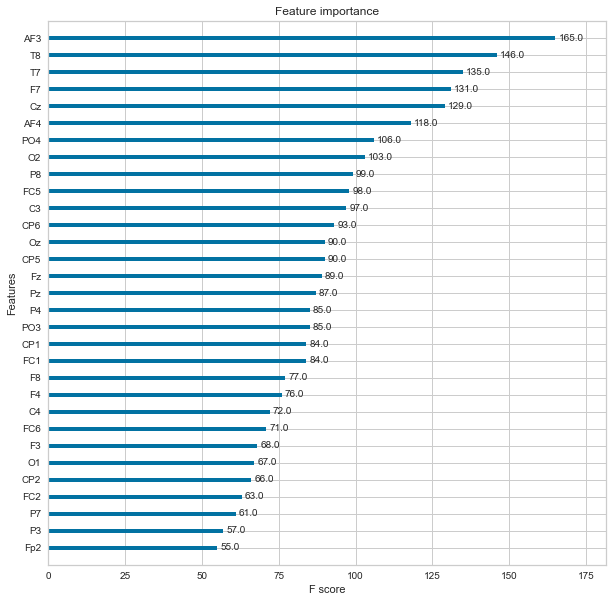

In [173]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

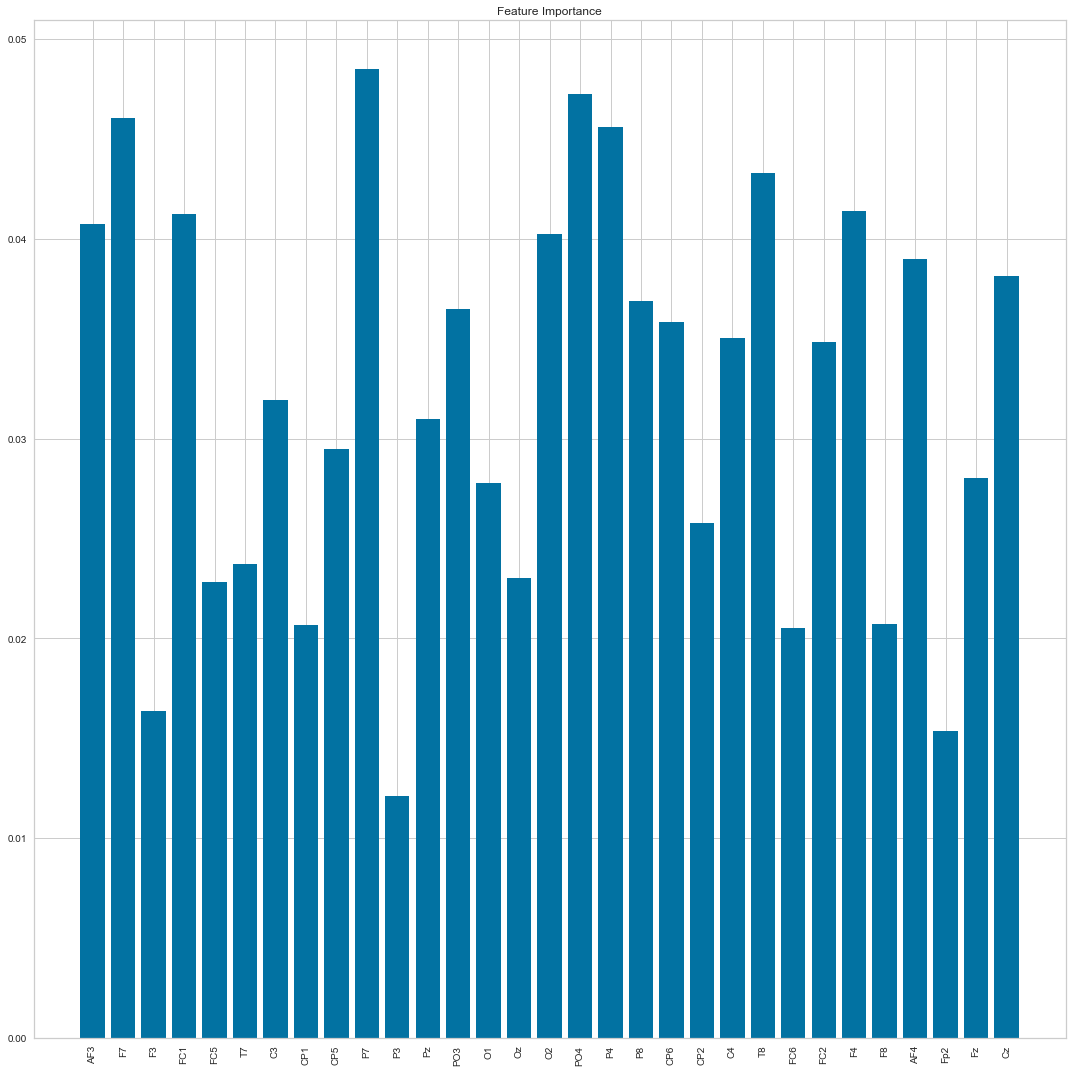

In [174]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

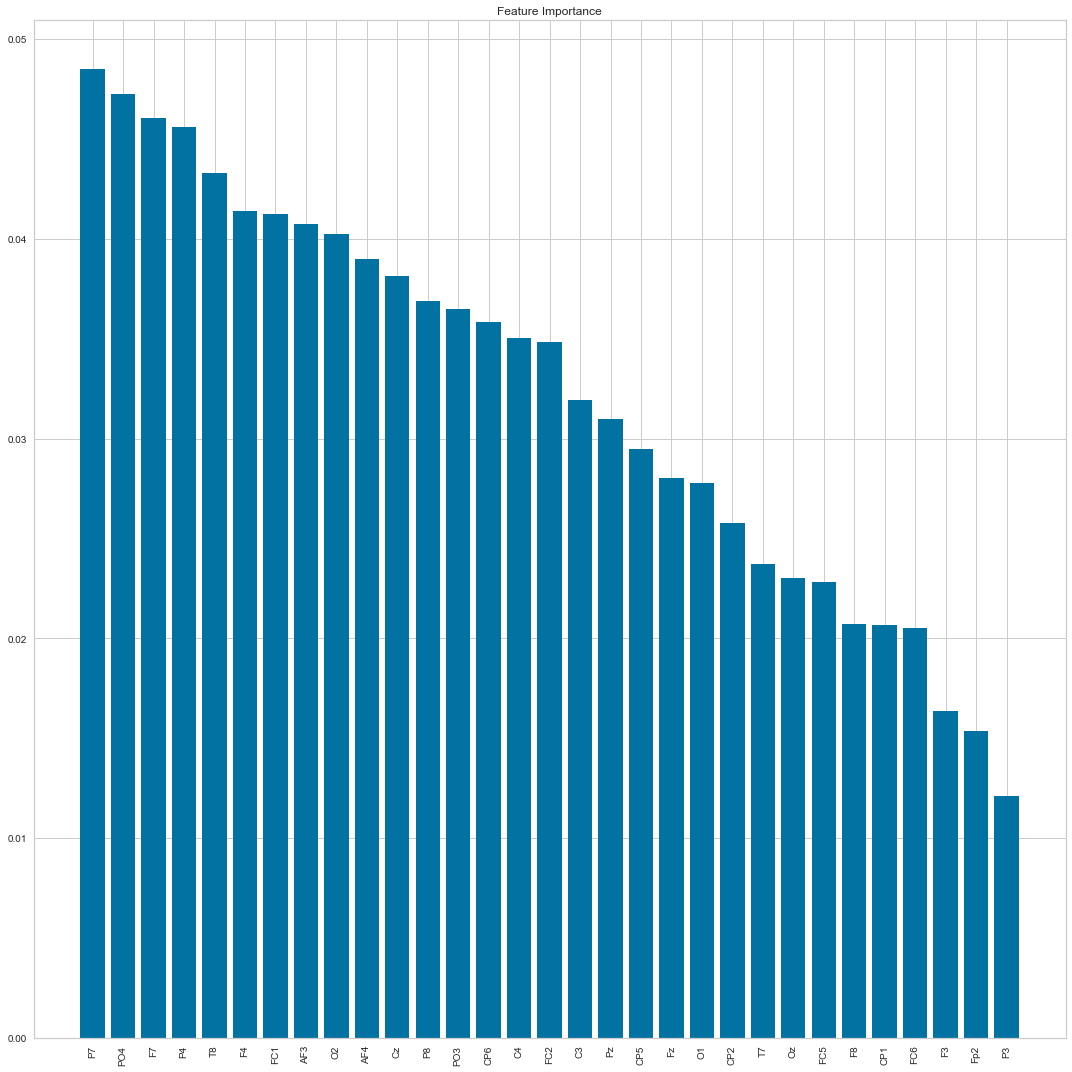

In [175]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [176]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.04075811, 0.04607105, 0.01634538, 0.04124465,
       0.02283774, 0.02373166, 0.03194117, 0.02065962, 0.02948422,
       0.04851321, 0.01211475, 0.03099833, 0.03649502, 0.0277946 ,
       0.02302467, 0.0402322 , 0.04723306, 0.0455879 , 0.03690933,
       0.03585412, 0.02575675, 0.03504957, 0.04332281, 0.0205293 ,
       0.03482856, 0.04139349, 0.02069821, 0.03899644, 0.01537402,
       0.02805289, 0.03816726])

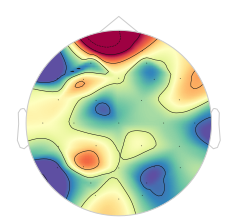

(<matplotlib.image.AxesImage at 0x21a3f7ea4f0>,
 <matplotlib.contour.QuadContourSet at 0x21a3f7ea910>)

In [177]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>10. Num Zero Crossings</h2>

In [178]:
num_zero_pd['Y'] = 1
num_zero['Y'] = 0

In [179]:
X1 = num_zero.append(num_zero_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,35,31,17,27,17,35,16,13,15,32,...,42,33,25,20,25,29,23,33,23,0
1,25,28,20,33,26,32,24,21,23,34,...,48,42,18,17,32,31,26,34,30,0
2,25,24,22,33,30,21,26,11,25,34,...,50,38,20,21,31,19,25,23,35,0
3,33,29,15,16,28,26,31,10,24,31,...,36,18,22,14,32,22,34,21,24,0
4,35,36,5,2,28,34,31,18,17,33,...,37,7,11,13,40,35,37,27,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,28,23,31,19,25,29,35,31,15,24,...,38,29,20,28,23,21,29,20,12,1
6275,31,29,23,27,31,25,31,27,20,25,...,43,21,22,25,23,27,21,19,16,1
6276,33,30,27,30,25,25,32,11,28,24,...,42,25,19,22,24,28,19,19,17,1
6277,26,30,30,30,18,28,28,16,25,24,...,45,28,23,20,24,22,24,24,21,1


In [180]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,7316
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [181]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9274,0.9762,0.9586,0.9096,0.9332,0.8539,0.8559,0.0280
xgboost,Extreme Gradient Boosting,0.9119,0.9715,0.9275,0.9083,0.9175,0.8231,0.8240,0.0840
et,Extra Trees Classifier,0.9083,0.9706,0.9353,0.8963,0.9150,0.8155,0.8171,0.0807
lightgbm,Light Gradient Boosting Machine,0.9031,0.9680,0.9215,0.8984,0.9095,0.8052,0.8061,0.0213
rf,Random Forest Classifier,0.8974,0.9614,0.9159,0.8933,0.9042,0.7938,0.7947,0.1020
qda,Quadratic Discriminant Analysis,0.8919,0.9542,0.8999,0.8962,0.8978,0.7831,0.7837,0.0047
gbc,Gradient Boosting Classifier,0.8523,0.9304,0.8848,0.8441,0.8636,0.7028,0.7045,0.1207
ada,Ada Boost Classifier,0.7779,0.8611,0.8271,0.7704,0.7973,0.5524,0.5551,0.0347
dt,Decision Tree Classifier,0.7725,0.7710,0.7969,0.7782,0.7871,0.5428,0.5434,0.0080
ridge,Ridge Classifier,0.7188,0.0000,0.7611,0.7222,0.7406,0.4339,0.4356,0.0027


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [182]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9556,0.9853,0.9740,0.9434,0.9585,0.9109,0.9114
1,0.9317,0.9841,0.9610,0.9136,0.9367,0.8627,0.8640
2,0.9386,0.9718,0.9610,0.9250,0.9427,0.8766,0.8773
3,0.9249,0.9716,0.9545,0.9074,0.9304,0.8490,0.8503
4,0.9283,0.9807,0.9481,0.9182,0.9329,0.8560,0.8565
5,0.9113,0.9575,0.9351,0.9000,0.9172,0.8217,0.8224
6,0.9590,0.9921,0.9548,0.9673,0.9610,0.9179,0.9180
7,0.9113,0.9790,0.9806,0.8686,0.9212,0.8205,0.8284
8,0.9283,0.9839,0.9613,0.9085,0.9342,0.8557,0.8573


In [183]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.9855,0.9416,0.9603,0.9508,0.8974,0.8976
1,0.9454,0.9794,0.9416,0.9539,0.9477,0.8906,0.8907
2,0.9181,0.9653,0.9026,0.9392,0.9205,0.8361,0.8368
3,0.9249,0.9648,0.9416,0.9177,0.9295,0.8492,0.8495
4,0.9249,0.9806,0.9091,0.9459,0.9272,0.8498,0.8505
5,0.9215,0.9547,0.9091,0.9396,0.9241,0.8429,0.8434
6,0.9556,0.9934,0.9290,0.9863,0.9568,0.9113,0.9130
7,0.9488,0.9795,0.9484,0.9545,0.9515,0.8973,0.8973
8,0.9249,0.9782,0.9226,0.9346,0.9286,0.8494,0.8495


In [184]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9215,0.9754,0.9286,0.9226,0.9256,0.8425,0.8426
1,0.9181,0.9791,0.9416,0.9062,0.9236,0.8354,0.8361
2,0.9113,0.9703,0.9026,0.9267,0.9145,0.8223,0.8226
3,0.8840,0.9599,0.8961,0.8846,0.8903,0.7671,0.7672
4,0.9215,0.9778,0.9156,0.9338,0.9246,0.8428,0.8429
5,0.9352,0.9719,0.9675,0.9141,0.9401,0.8696,0.8712
6,0.9283,0.9770,0.9097,0.9527,0.9307,0.8566,0.8576
7,0.9113,0.9747,0.9484,0.8909,0.9187,0.8212,0.8232
8,0.9317,0.9819,0.9290,0.9412,0.9351,0.8631,0.8632


In [185]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [187]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8919440424505547


In [188]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.52%


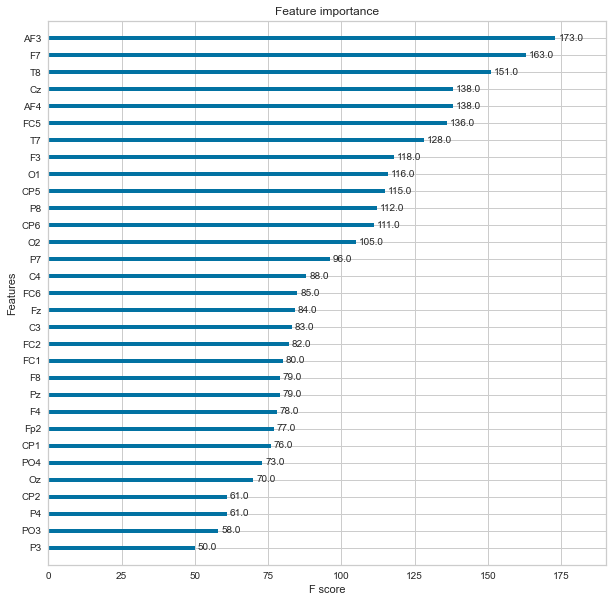

In [189]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

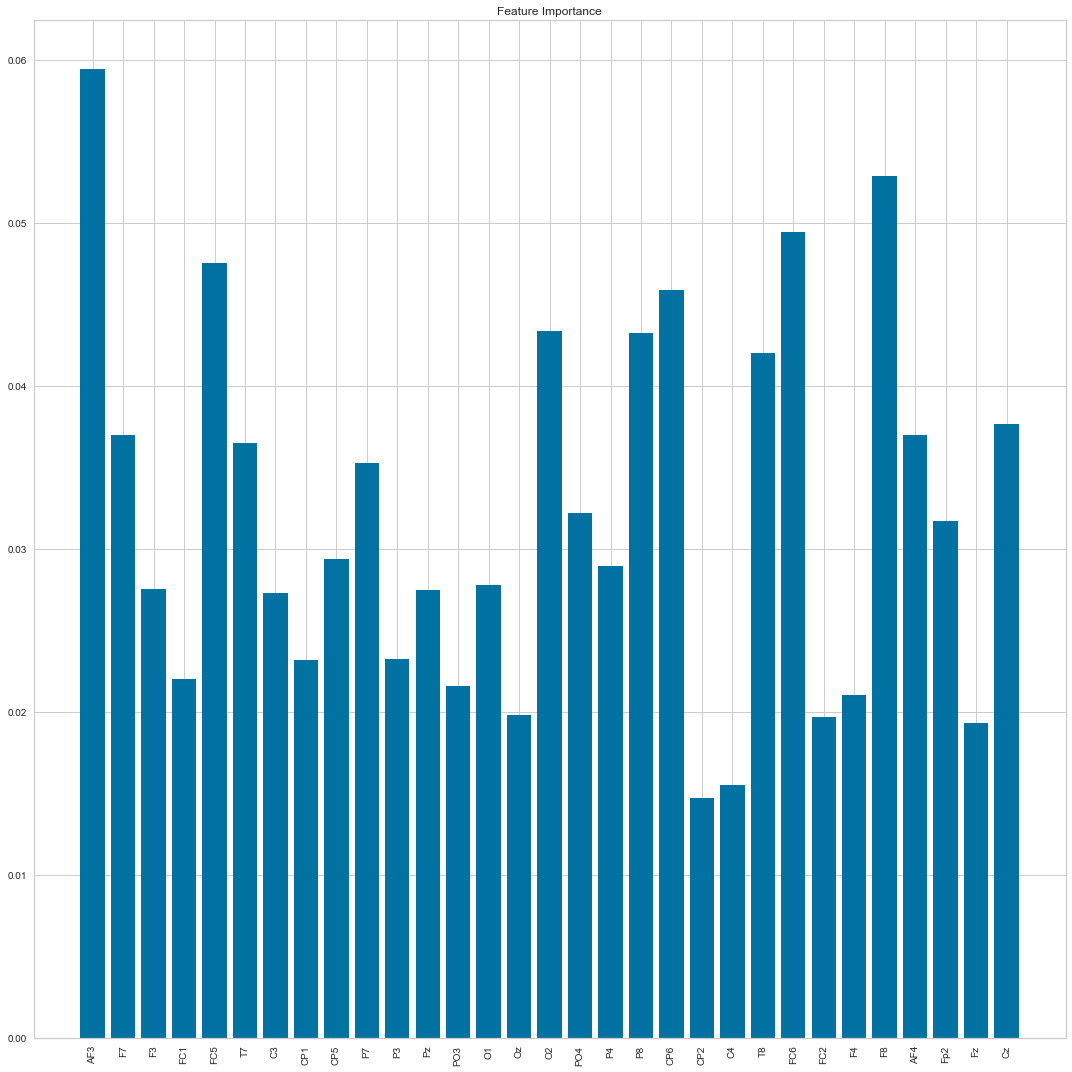

In [190]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

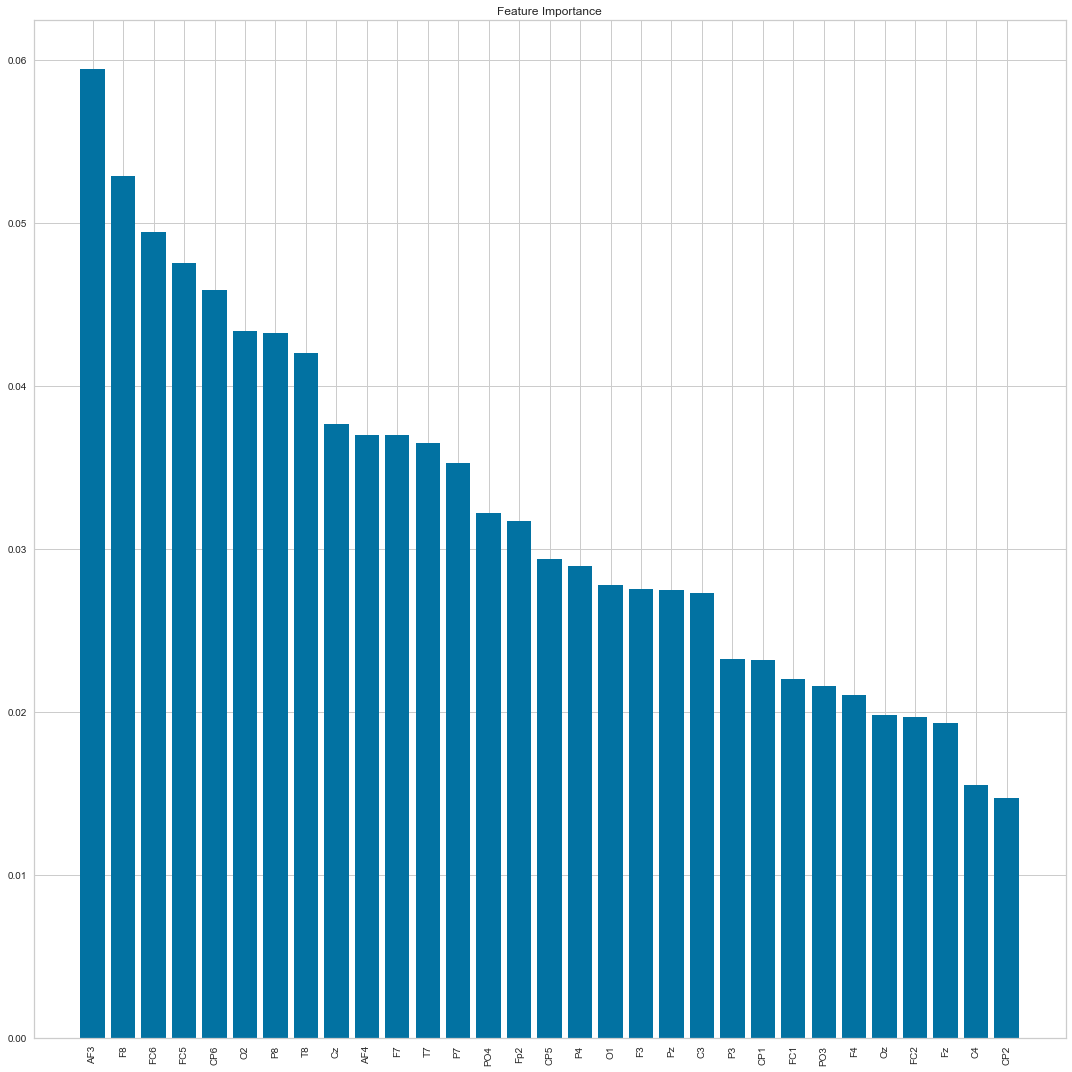

In [191]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [192]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.05946286, 0.03700976, 0.02755641, 0.02204656,
       0.04756812, 0.03652833, 0.02728157, 0.02321325, 0.02939614,
       0.03528833, 0.02325699, 0.02746719, 0.02159615, 0.02776829,
       0.01983149, 0.04337075, 0.0322287 , 0.02893209, 0.0432454 ,
       0.04591843, 0.01470943, 0.01552547, 0.0420129 , 0.04945025,
       0.01967564, 0.02103137, 0.05288829, 0.03702358, 0.03168699,
       0.01934088, 0.03768847])

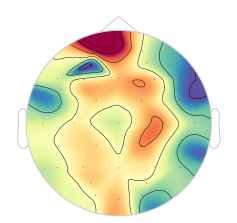

(<matplotlib.image.AxesImage at 0x21a433dcb20>,
 <matplotlib.contour.QuadContourSet at 0x21a433dcfa0>)

In [193]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>11. Lziv </h2>

In [194]:
lziv_pd['Y'] = 1
lziv['Y'] = 0

In [195]:
X1 = lziv.append(lziv_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6275,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6276,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6277,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [196]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,2303
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [197]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0047
dt,Decision Tree Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0033
ridge,Ridge Classifier,0.5199,0.0000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0033
rf,Random Forest Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0413
ada,Ada Boost Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0200
gbc,Gradient Boosting Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0160
et,Extra Trees Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0347
xgboost,Extreme Gradient Boosting,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0227
lightgbm,Light Gradient Boosting Machine,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0053
dummy,Dummy Classifier,0.5199,0.5000,1.0000,0.5199,0.6841,0.0000,0.0000,0.0027


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2303, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2>12. Detrended Fluctuation </h2>

In [198]:
det_fluc_pd['Y'] = 1
det_fluc['Y'] = 0

In [199]:
X1 = det_fluc.append(det_fluc_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,...,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243,0
1,1.456079,1.449821,1.622980,1.533607,1.541167,1.612092,1.654204,1.586892,1.587276,1.527927,...,1.492348,1.544755,1.614032,1.560697,1.461258,1.557629,1.521826,1.523514,1.513283,0
2,1.541186,1.482486,1.613466,1.528603,1.532222,1.631803,1.639704,1.562367,1.573113,1.520686,...,1.453583,1.474000,1.534575,1.527924,1.510512,1.578918,1.553045,1.536778,1.483738,0
3,1.390941,1.402871,1.596402,1.495266,1.554780,1.496912,1.603186,1.660821,1.579757,1.517759,...,1.430093,1.489879,1.569544,1.515127,1.482505,1.532295,1.448439,1.564737,1.477792,0
4,1.416821,1.346392,1.551523,1.691033,1.581071,1.495718,1.548971,1.651642,1.614037,1.619680,...,1.373428,1.485919,1.607653,1.500125,1.369573,1.408493,1.498701,1.536175,1.481181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.599706,1.638338,1.662639,1.666815,1.671590,1.623869,1.579428,1.652344,1.749393,1.772776,...,1.455101,1.549298,1.740671,1.660964,1.663782,1.692187,1.718027,1.739321,1.692193,1
6275,1.618640,1.635004,1.710625,1.615165,1.674898,1.703327,1.603179,1.735353,1.753609,1.780574,...,1.368565,1.578505,1.736048,1.623643,1.709602,1.600951,1.743726,1.753889,1.709803,1
6276,1.539277,1.594530,1.731016,1.620800,1.710961,1.722729,1.576687,1.746209,1.717835,1.721397,...,1.316594,1.550941,1.740521,1.639646,1.709461,1.561728,1.748191,1.781975,1.697115,1
6277,1.554842,1.590614,1.702907,1.657121,1.686328,1.675682,1.647008,1.698668,1.720639,1.777738,...,1.349911,1.571916,1.672690,1.702243,1.655670,1.660154,1.716672,1.690388,1.687377,1


In [200]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,626
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6279, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [201]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9604,0.9888,0.9472,0.9757,0.9611,0.9208,0.9216,0.1780
lightgbm,Light Gradient Boosting Machine,0.9497,0.9873,0.9442,0.9582,0.9510,0.8994,0.8997,0.0613
xgboost,Extreme Gradient Boosting,0.9479,0.9892,0.9450,0.9542,0.9494,0.8957,0.8962,0.2933
qda,Quadratic Discriminant Analysis,0.9458,0.9844,0.9397,0.9552,0.9473,0.8916,0.8921,0.0047
et,Extra Trees Classifier,0.9374,0.9833,0.9252,0.9527,0.9386,0.8748,0.8756,0.0793
rf,Random Forest Classifier,0.9292,0.9789,0.9208,0.9414,0.9307,0.8584,0.8592,0.1467
gbc,Gradient Boosting Classifier,0.9040,0.9654,0.9015,0.9131,0.9066,0.8078,0.8091,0.2907
dt,Decision Tree Classifier,0.8441,0.8439,0.8514,0.8484,0.8496,0.6879,0.6884,0.0127
ada,Ada Boost Classifier,0.8289,0.9071,0.8439,0.8293,0.8359,0.6572,0.6584,0.0713
ridge,Ridge Classifier,0.8139,0.0000,0.8338,0.8121,0.8224,0.6270,0.6280,0.0033


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [202]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9727,0.9964,0.9735,0.9735,0.9735,0.9453,0.9453
1,0.9522,0.9825,0.9338,0.9724,0.9527,0.9045,0.9052
2,0.9659,0.9873,0.9669,0.9669,0.9669,0.9317,0.9317
3,0.9454,0.9915,0.9073,0.9856,0.9448,0.8910,0.8940
4,0.9659,0.9892,0.9404,0.9930,0.9660,0.9318,0.9332
5,0.9488,0.9912,0.9272,0.9722,0.9492,0.8977,0.8987
6,0.9556,0.9802,0.9539,0.9603,0.9571,0.9112,0.9112
7,0.9625,0.9920,0.9342,0.9930,0.9627,0.9250,0.9267
8,0.9863,0.9944,0.9934,0.9805,0.9869,0.9726,0.9727


In [203]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9283,0.9868,0.9669,0.9012,0.9329,0.8562,0.8586
1,0.9352,0.9852,0.9338,0.9400,0.9369,0.8702,0.8702
2,0.9454,0.9896,0.9603,0.9355,0.9477,0.8906,0.8909
3,0.9317,0.9839,0.9139,0.9517,0.9324,0.8635,0.8642
4,0.9420,0.9816,0.9272,0.9589,0.9428,0.8840,0.8845
5,0.9420,0.9898,0.9404,0.9467,0.9435,0.8839,0.8839
6,0.9454,0.9908,0.9474,0.9474,0.9474,0.8906,0.8906
7,0.9420,0.9923,0.9211,0.9655,0.9428,0.8840,0.8850
8,0.9693,0.9945,0.9671,0.9735,0.9703,0.9385,0.9385
